In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset
train_generator = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/capstone project',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
model.fit(train_generator, epochs=epochs)

model.save('stock_candle_ai_model.h5')

Found 16 images belonging to 2 classes.
Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.7039 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 6.6129 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 2.8009 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6879 - accuracy: 0.5625
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.9654 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.8485 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 3s 3s/step - loss: 0.7371 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 0.6947 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.7004 - accuracy: 0.5000
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 107ms/step


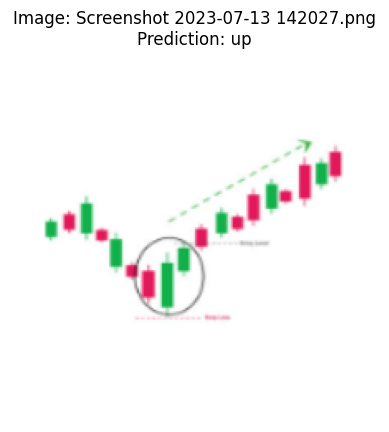

1/1 [==============================] - 0s 34ms/step


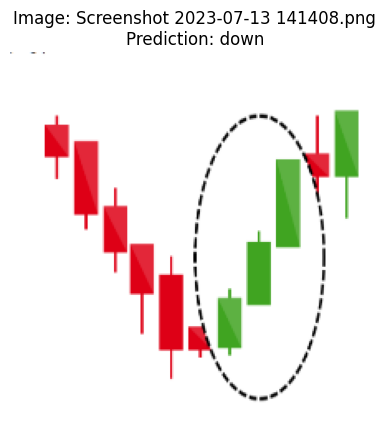

1/1 [==============================] - 0s 34ms/step


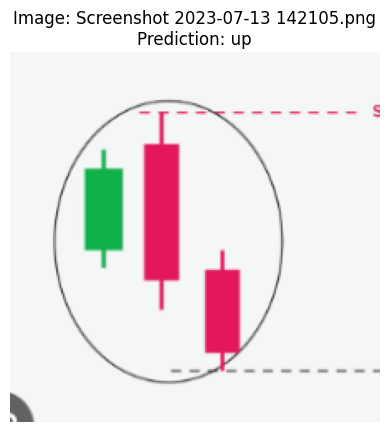

1/1 [==============================] - 0s 35ms/step


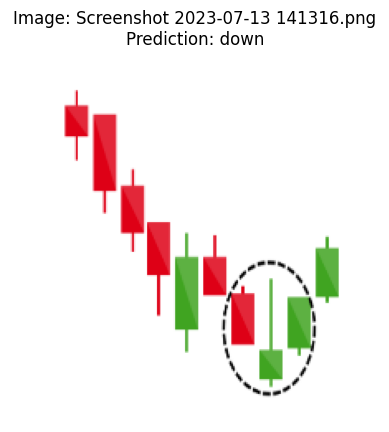

1/1 [==============================] - 0s 33ms/step


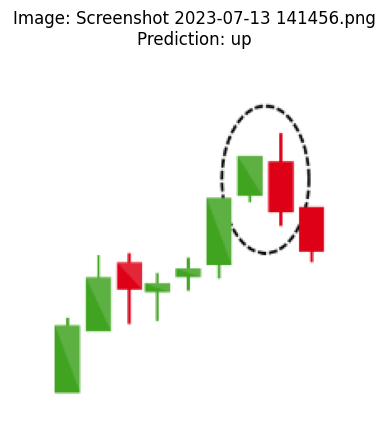

1/1 [==============================] - 0s 35ms/step


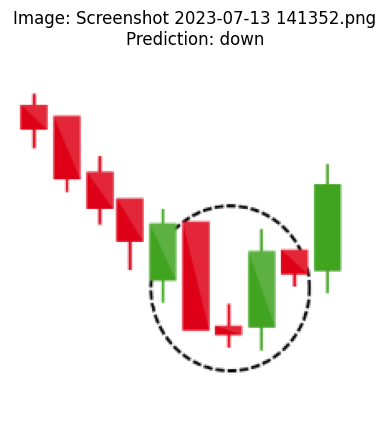

1/1 [==============================] - 0s 34ms/step


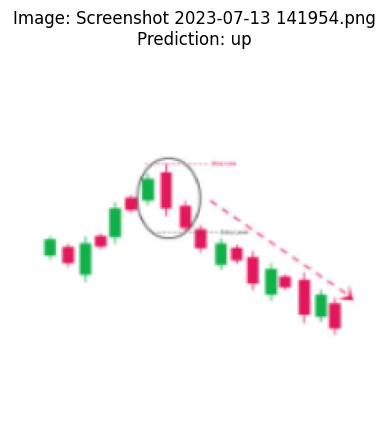

1/1 [==============================] - 0s 35ms/step


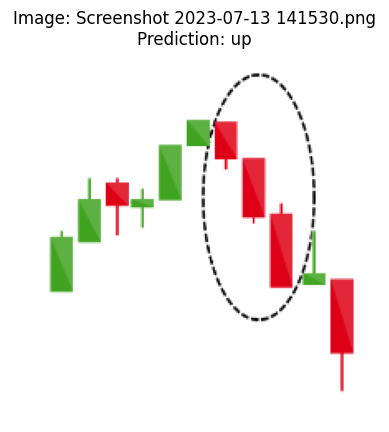

1/1 [==============================] - 0s 48ms/step


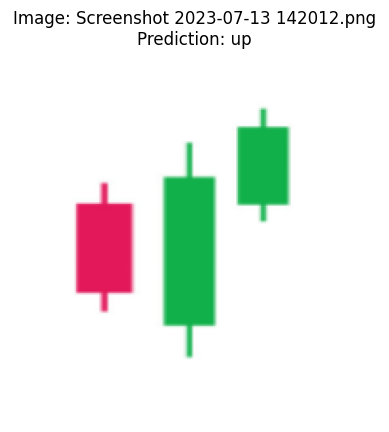

1/1 [==============================] - 0s 53ms/step


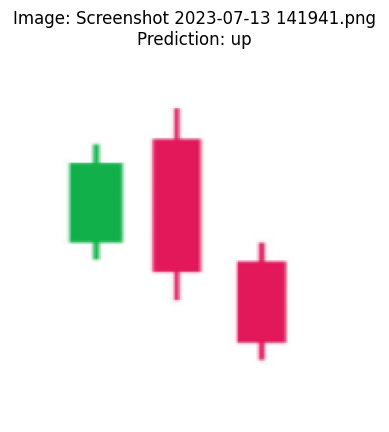

1/1 [==============================] - 0s 48ms/step


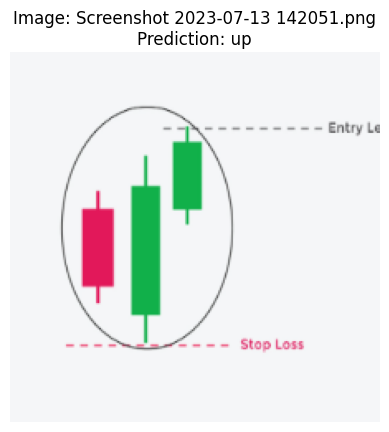

1/1 [==============================] - 0s 51ms/step


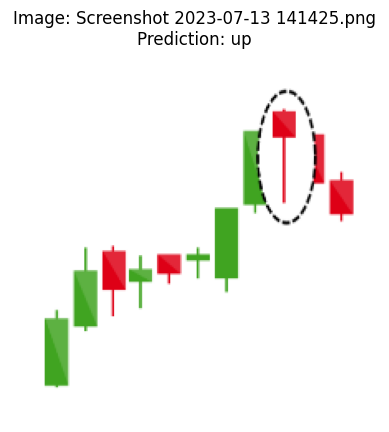

1/1 [==============================] - 0s 51ms/step


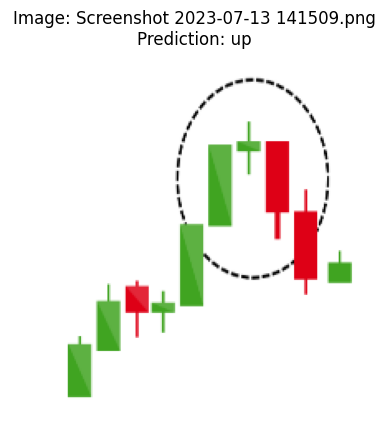

1/1 [==============================] - 0s 50ms/step


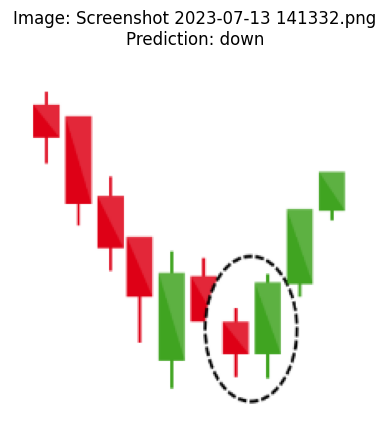

1/1 [==============================] - 0s 36ms/step


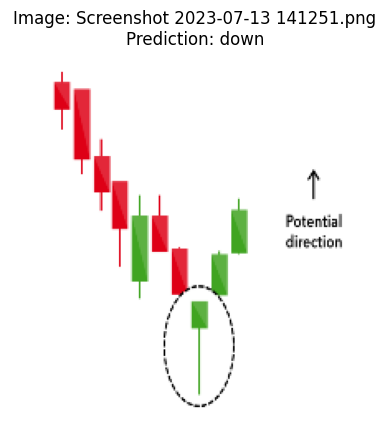

1/1 [==============================] - 0s 44ms/step


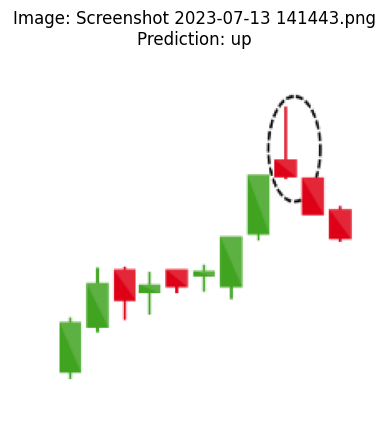

In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


model = keras.models.load_model('stock_candle_ai_model.h5')

input_directory = '/content/drive/MyDrive/input'

input_images = os.listdir(input_directory)

# Iterate through each input image
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224)) # the size can be changed according to the input size of the image
    img = np.expand_dims(img, axis=0)  # Add a batch dimension

    # Predict using the model
    prediction = model.predict(img)

    # Classify as "up" or "down" based on the prediction
    if prediction > 0.5:
        result = "up"
    else:
        result = "down"

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()

In [ ]:
### CIFAR Implementation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 20

# Create a CNN model for CIFAR-10
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two classes: "up" and "down"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # convert to pixel values either 0 or 1  [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset (CIFAR-10)
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (_, _) = cifar10.load_data()

# defile our two classes
up_class = 0
down_class = 1

up_images = train_images[train_labels[:, 0] == up_class]
down_images = train_images[train_labels[:, 0] == down_class]

up_labels = train_labels[train_labels[:, 0] == up_class]
down_labels = train_labels[train_labels[:, 0] == down_class]

# Combine the "up" and "down" classes
filtered_images = np.vstack((up_images, down_images))
filtered_labels = np.concatenate((up_labels, down_labels))

# Resize the images to match the input size (32x32) . cifar apparently only allows 32x32 image size
filtered_images_resized = np.array([cv2.resize(img, (32, 32)) for img in filtered_images])

train_generator = train_data_gen.flow(filtered_images_resized, filtered_labels, batch_size=batch_size)

# Train the model
model.fit(train_generator, epochs=epochs)

model.save('cifar.h5')


Epoch 1/20
313/313 [==============================] - 13s 38ms/step - loss: 0.4978 - accuracy: 0.4836
Epoch 2/20
313/313 [==============================] - 13s 43ms/step - loss: 0.3691 - accuracy: 0.4976
Epoch 3/20
313/313 [==============================] - 12s 39ms/step - loss: 0.3281 - accuracy: 0.4952
Epoch 4/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2931 - accuracy: 0.4942
Epoch 5/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2689 - accuracy: 0.4961
Epoch 6/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2520 - accuracy: 0.4967
Epoch 7/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2378 - accuracy: 0.4945
Epoch 8/20
313/313 [==============================] - 12s 38ms/step - loss: 0.2366 - accuracy: 0.4985
Epoch 9/20
313/313 [==============================] - 12s 38ms/step - loss: 0.2181 - accuracy: 0.4990
Epoch 10/20
313/313 [==============================] - 12s 38ms/step - loss: 0.202

1/1 [==============================] - 0s 299ms/step


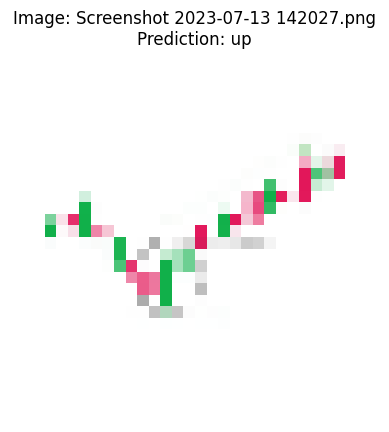

1/1 [==============================] - 0s 18ms/step


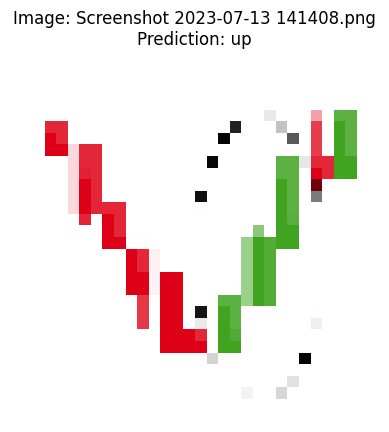

1/1 [==============================] - 0s 19ms/step


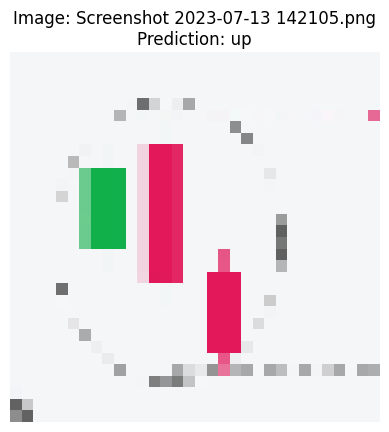

1/1 [==============================] - 0s 19ms/step


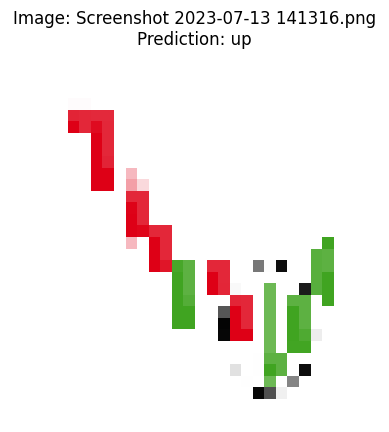

1/1 [==============================] - 0s 20ms/step


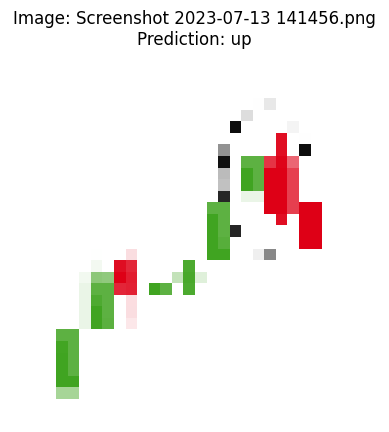

1/1 [==============================] - 0s 19ms/step


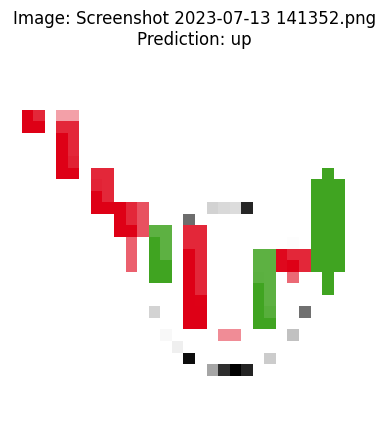

1/1 [==============================] - 0s 18ms/step


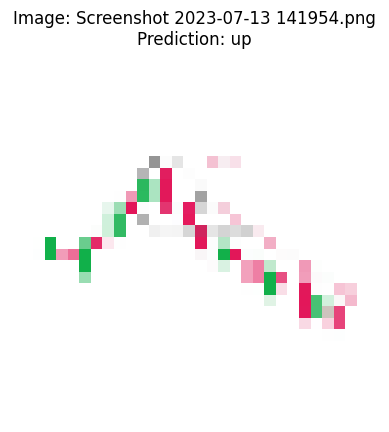

1/1 [==============================] - 0s 19ms/step


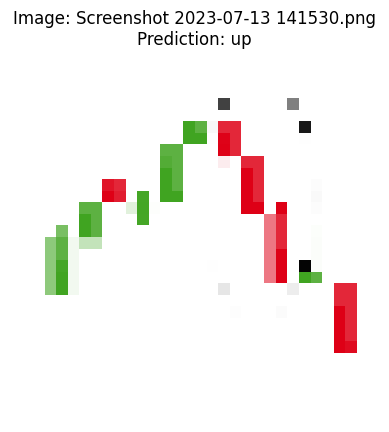

1/1 [==============================] - 0s 19ms/step


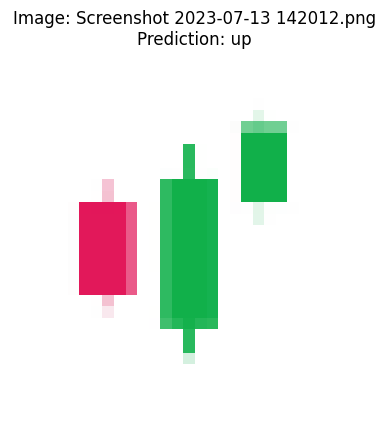

1/1 [==============================] - 0s 18ms/step


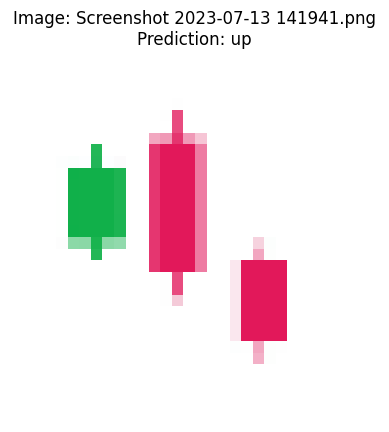

1/1 [==============================] - 0s 22ms/step


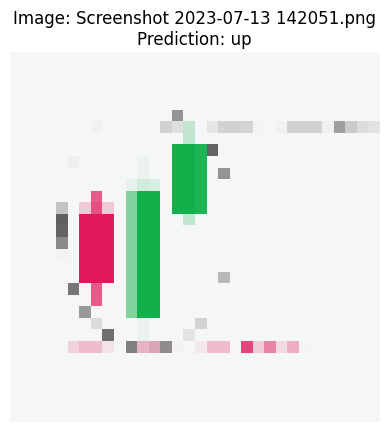

1/1 [==============================] - 0s 18ms/step


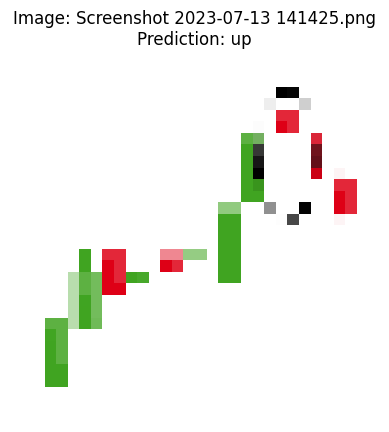

1/1 [==============================] - 0s 25ms/step


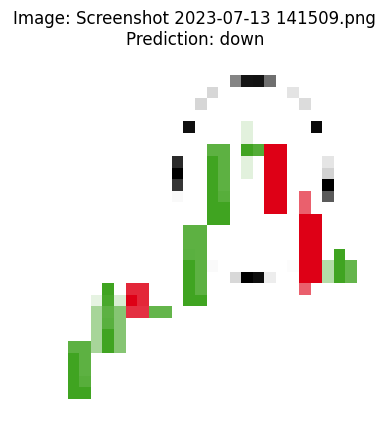

1/1 [==============================] - 0s 17ms/step


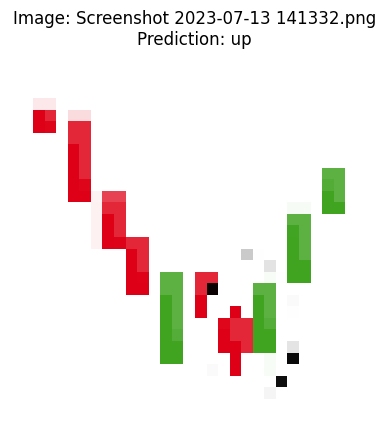

1/1 [==============================] - 0s 17ms/step


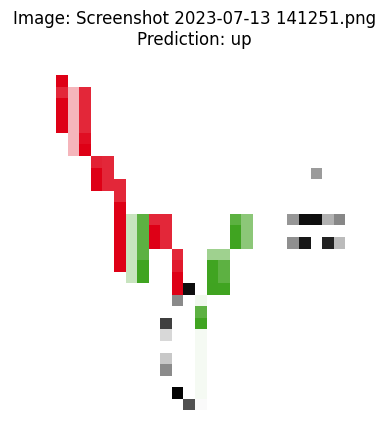

1/1 [==============================] - 0s 22ms/step


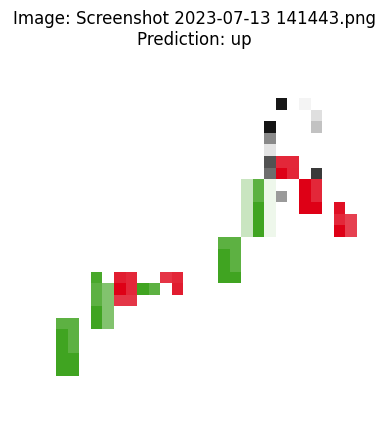

In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


model = keras.models.load_model('cifar.h5')

# image inputs
input_directory = '/content/drive/MyDrive/input'

# input images
input_images = os.listdir(input_directory)

# Map class indices to class names
class_names = {0: "up", 1: "down"}

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32)) # we can adjust the size accordingly to our input format
    img = np.expand_dims(img, axis=0) # adds a dimension

    # Predict using the cifar model
    prediction = model.predict(img)

    # Classify as "up" or "down" based on the prediction
    class_index = np.argmax(prediction)
    result = class_names[class_index]

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Define the parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 20

# Create a CNN model for the new classes
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # Seven classes: ['Doji', 'Doji star', 'Hammer', 'Hanging man', 'Morning star', 'Rain Drop', 'Shooting Star']
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # convert to pixel values either 0 or 1  [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset (Custom dataset)
# Example: Directory structure - /data/Doji, /data/Doji_star, etc.
data_directory = '/path/to/your/data'

# Map class indices to class names
class_names = {0: "Doji", 1: "Doji star", 2: "Hammer", 3: "Hanging man", 4: "Morning star", 5: "Rain Drop", 6: "Shooting Star"}

# Generate data batches from images in the specified directory
train_generator = train_data_gen.flow_from_directory(
    data_directory,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='sparse'  # for sparse labels
)

# Train the model
model.fit(train_generator, epochs=epochs)

# Save the trained model
model.save('custom_classes_model.h5')

# Load the trained model
model = keras.models.load_model('custom_classes_model.h5')

# Directory containing input images
input_directory = '/path/to/your/input'

# List input images
input_images = os.listdir(input_directory)

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=0)

    # Predict using the model
    prediction = model.predict(img)

    # Classify the prediction
    class_index = np.argmax(prediction)
    result = class_names[class_index]

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Define the parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 20

# Create a CNN model for the new classes
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # Seven classes: ['Doji', 'Doji star', 'Hammer', 'Hanging man', 'Morning star', 'Rain Drop', 'Shooting Star']
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # convert to pixel values either 0 or 1  [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset (Custom dataset)
# Example: Directory structure - /data/Doji, /data/Doji_star, etc.
data_directory = '/content/drive/MyDrive/NEWDATASET'

# Map class indices to class names
class_names = {0: "Doji", 1: "Doji star", 2: "Hammer", 3: "Hanging man", 4: "Morning star", 5: "Rain Drop", 6: "Shooting Star"}

# Generate data batches from images in the specified directory
train_generator = train_data_gen.flow_from_directory(
    data_directory,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='sparse'  # for sparse labels
)

# Train the model
model.fit(train_generator, epochs=epochs)




Found 2100 images belonging to 7 classes.
Epoch 1/20
66/66 [==============================] - 11s 141ms/step - loss: 1.9488 - accuracy: 0.1414
Epoch 2/20
66/66 [==============================] - 10s 156ms/step - loss: 1.9466 - accuracy: 0.1405
Epoch 3/20
66/66 [==============================] - 10s 157ms/step - loss: 1.9460 - accuracy: 0.1481
Epoch 4/20
66/66 [==============================] - 10s 147ms/step - loss: 1.9466 - accuracy: 0.1490
Epoch 5/20
66/66 [==============================] - 10s 151ms/step - loss: 1.9458 - accuracy: 0.1557
Epoch 6/20
66/66 [==============================] - 11s 159ms/step - loss: 1.9449 - accuracy: 0.1467
Epoch 7/20
66/66 [==============================] - 10s 152ms/step - loss: 1.9449 - accuracy: 0.1519
Epoch 8/20
66/66 [==============================] - 10s 152ms/step - loss: 1.9435 - accuracy: 0.1557
Epoch 9/20
66/66 [==============================] - 10s 158ms/step - loss: 1.9435 - accuracy: 0.1605
Epoch 10/20
66/66 [==============================

Error: Unable to read image 'Hanging man'. Skipping...
Error: Unable to read image 'Morning star'. Skipping...
Error: Unable to read image 'Doji'. Skipping...
Error: Unable to read image 'Shooting Star'. Skipping...
Error: Unable to read image 'Hammer'. Skipping...
Error: Unable to read image 'Doji star'. Skipping...
Error: Unable to read image 'Rain Drop'. Skipping...
1/1 [==============================] - 1s 590ms/step


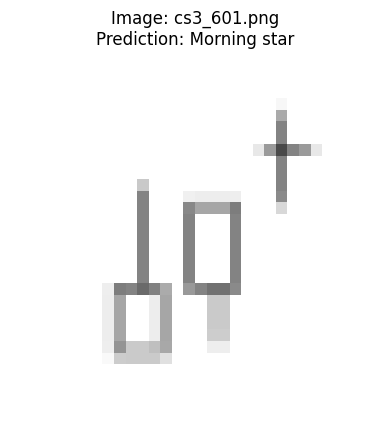

1/1 [==============================] - 0s 98ms/step


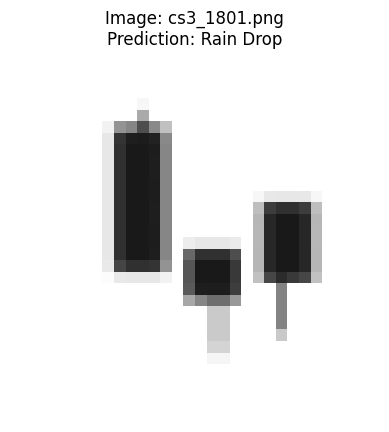

1/1 [==============================] - 0s 85ms/step


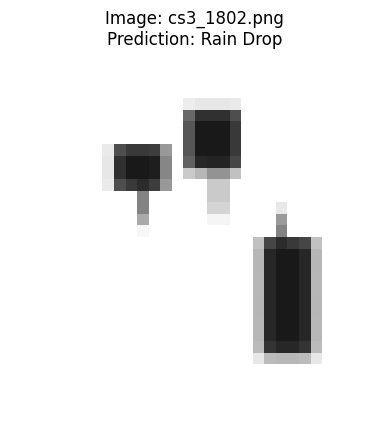

1/1 [==============================] - 0s 118ms/step


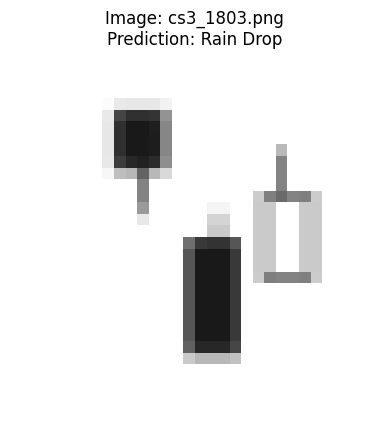

1/1 [==============================] - 0s 26ms/step


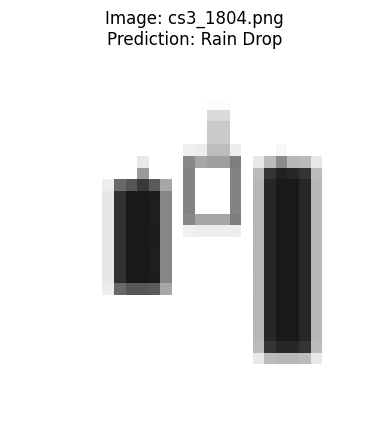

1/1 [==============================] - 0s 25ms/step


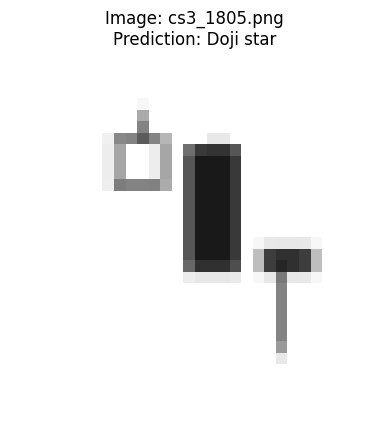

1/1 [==============================] - 0s 21ms/step


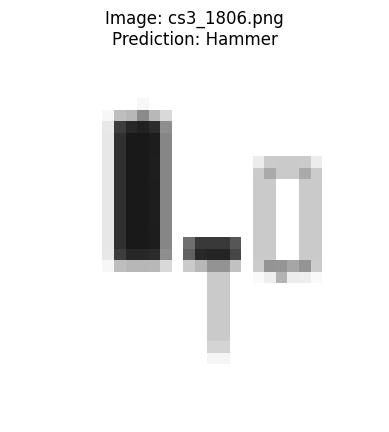

1/1 [==============================] - 0s 22ms/step


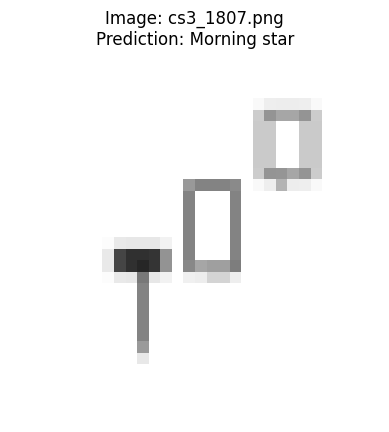

1/1 [==============================] - 0s 21ms/step


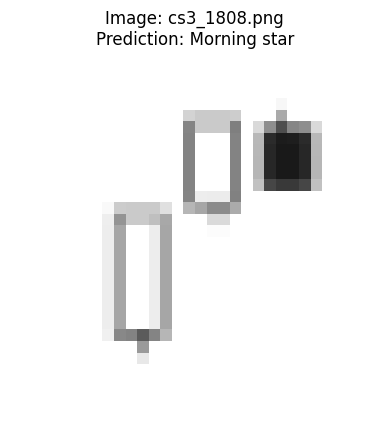

1/1 [==============================] - 0s 21ms/step


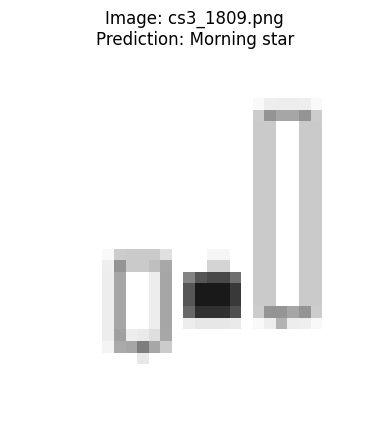

1/1 [==============================] - 0s 23ms/step


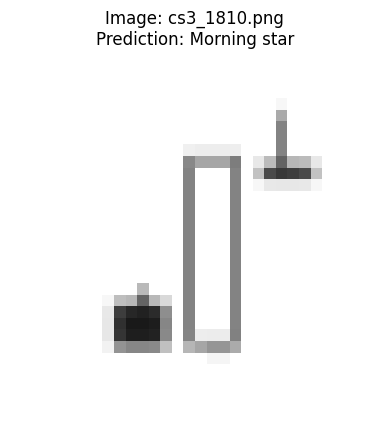

1/1 [==============================] - 0s 21ms/step


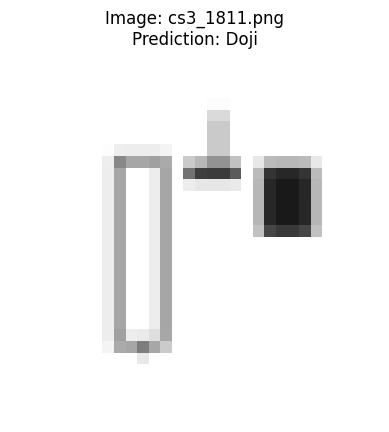

1/1 [==============================] - 0s 21ms/step


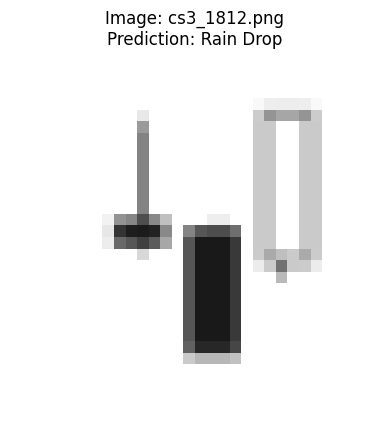

1/1 [==============================] - 0s 23ms/step


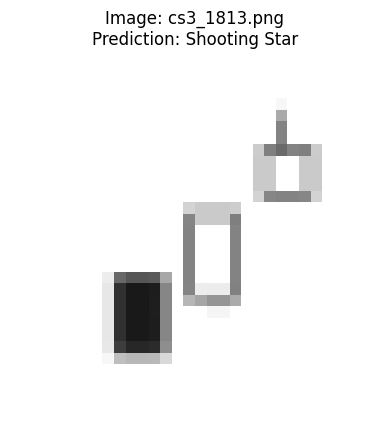

1/1 [==============================] - 0s 22ms/step


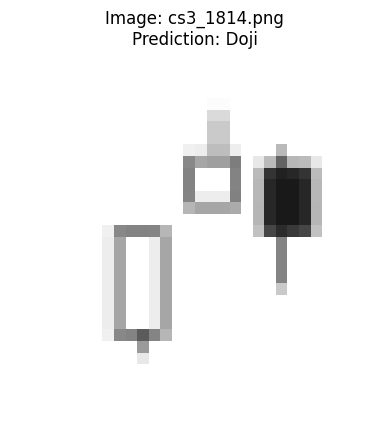

1/1 [==============================] - 0s 20ms/step


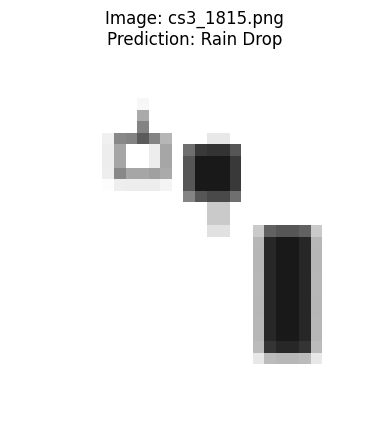

1/1 [==============================] - 0s 21ms/step


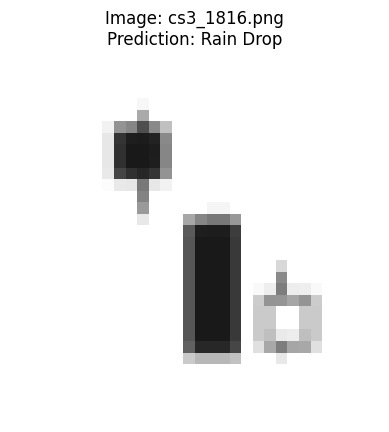

1/1 [==============================] - 0s 21ms/step


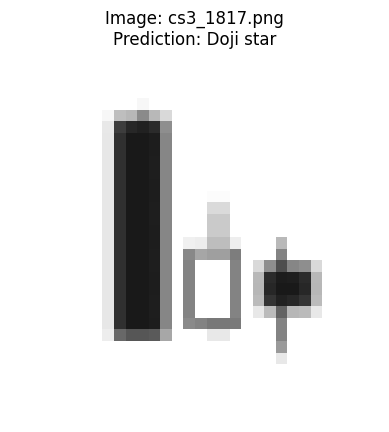

1/1 [==============================] - 0s 26ms/step


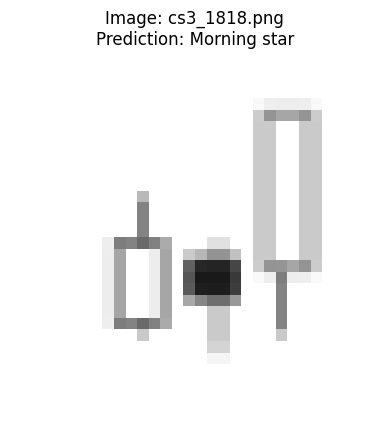

1/1 [==============================] - 0s 20ms/step


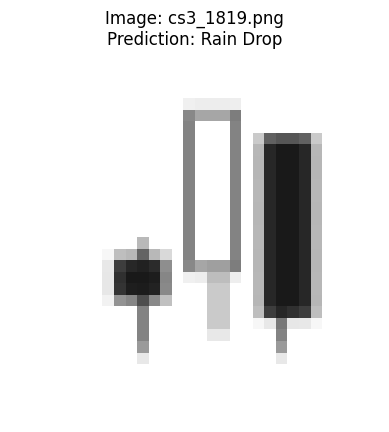

1/1 [==============================] - 0s 23ms/step


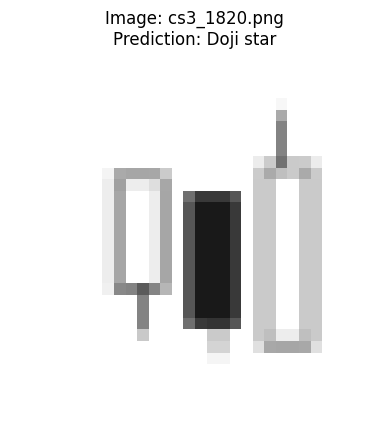

1/1 [==============================] - 0s 21ms/step


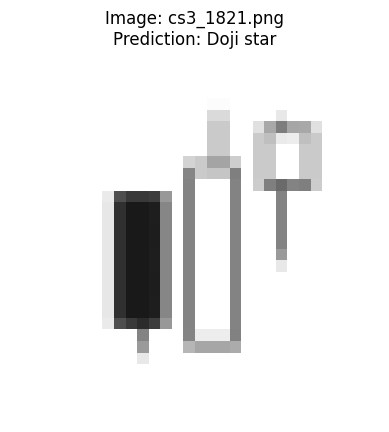

1/1 [==============================] - 0s 21ms/step


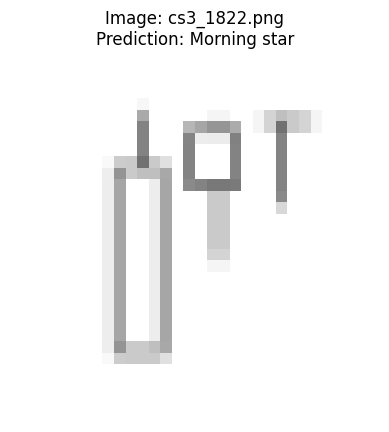

1/1 [==============================] - 0s 21ms/step


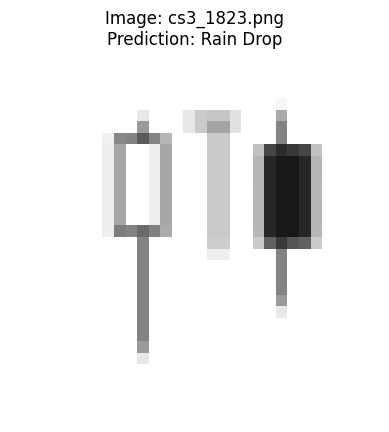

1/1 [==============================] - 0s 23ms/step


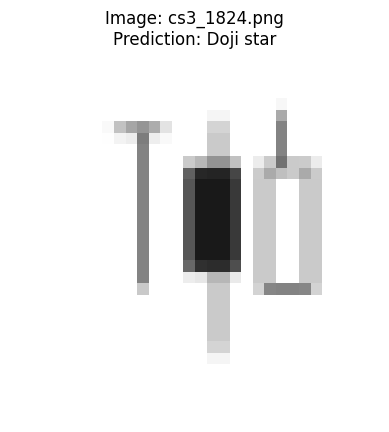

1/1 [==============================] - 0s 20ms/step


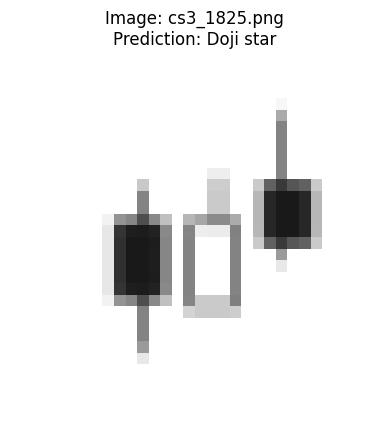

1/1 [==============================] - 0s 22ms/step


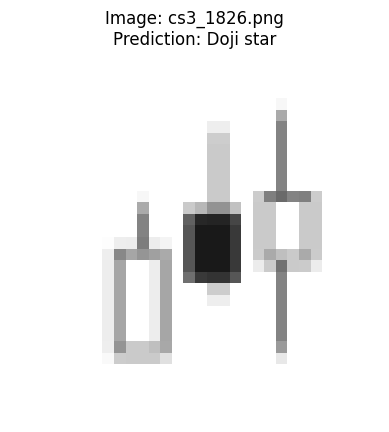

1/1 [==============================] - 0s 20ms/step


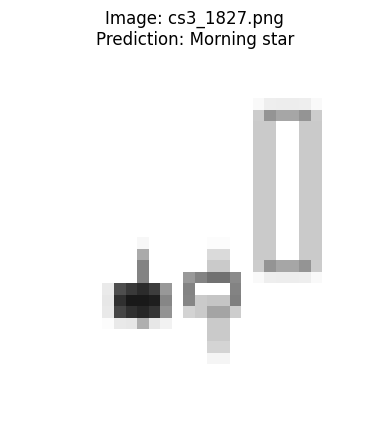

1/1 [==============================] - 0s 21ms/step


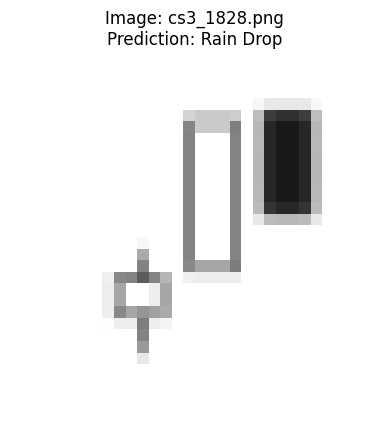

1/1 [==============================] - 0s 21ms/step


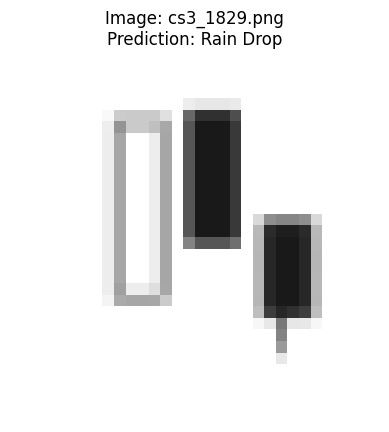

1/1 [==============================] - 0s 22ms/step


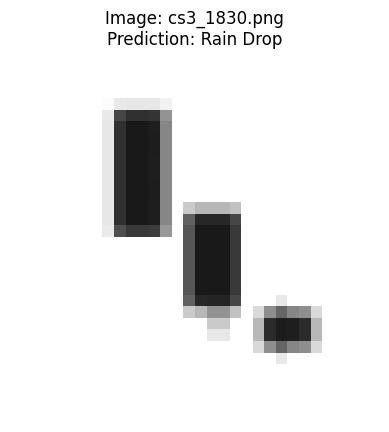

1/1 [==============================] - 0s 20ms/step


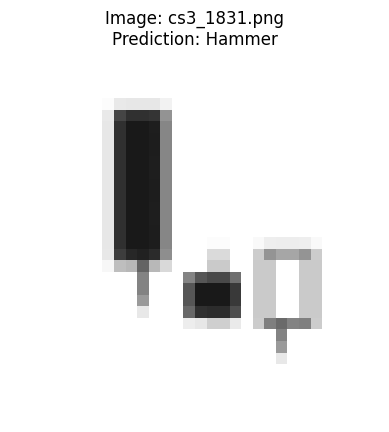

1/1 [==============================] - 0s 21ms/step


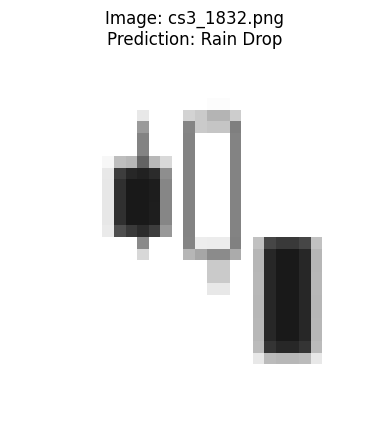

1/1 [==============================] - 0s 28ms/step


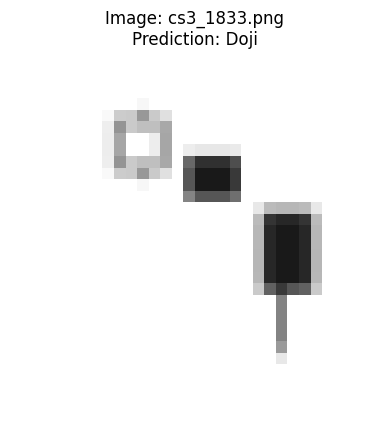

1/1 [==============================] - 0s 29ms/step


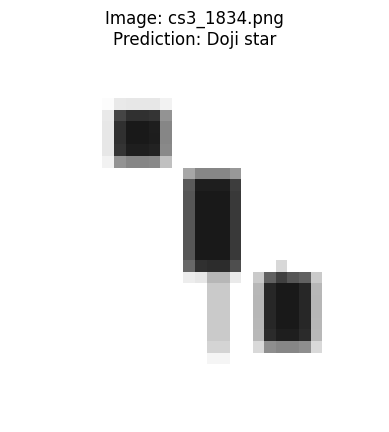

1/1 [==============================] - 0s 29ms/step


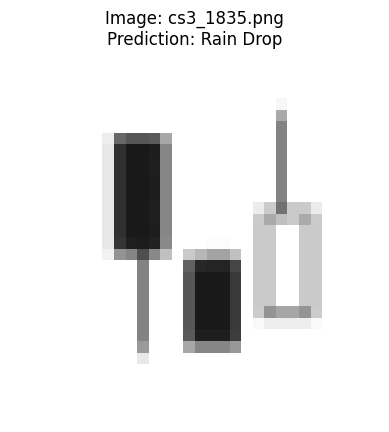

1/1 [==============================] - 0s 29ms/step


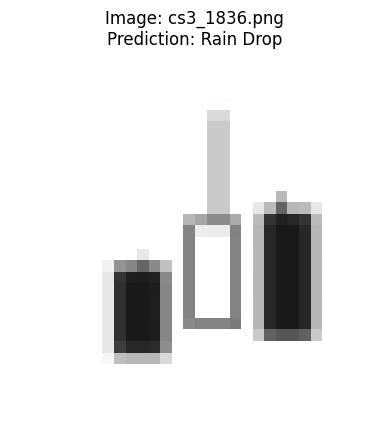

1/1 [==============================] - 0s 29ms/step


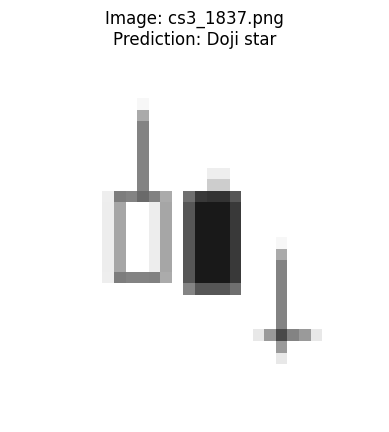

1/1 [==============================] - 0s 33ms/step


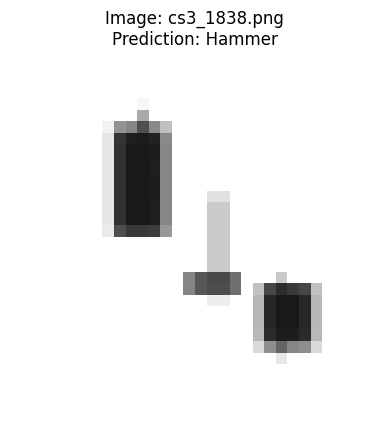

1/1 [==============================] - 0s 29ms/step


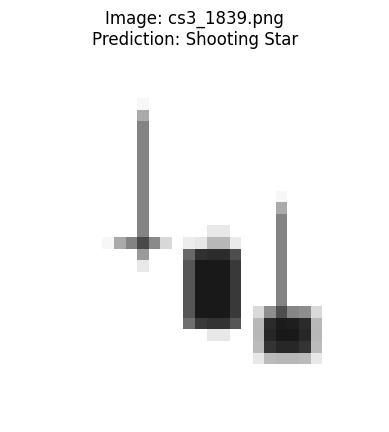

1/1 [==============================] - 0s 28ms/step


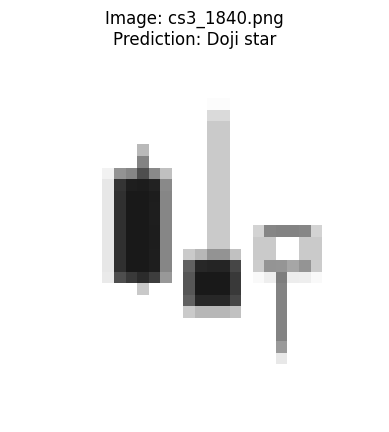

1/1 [==============================] - 0s 29ms/step


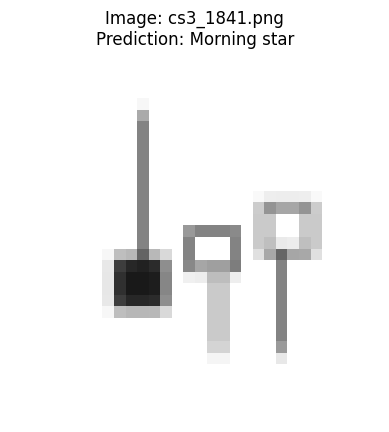

1/1 [==============================] - 0s 29ms/step


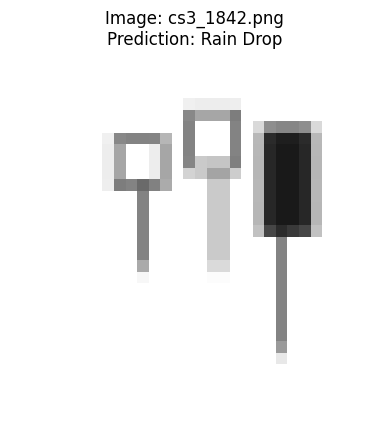

1/1 [==============================] - 0s 29ms/step


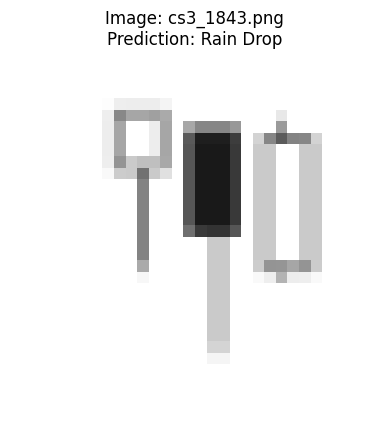

1/1 [==============================] - 0s 38ms/step


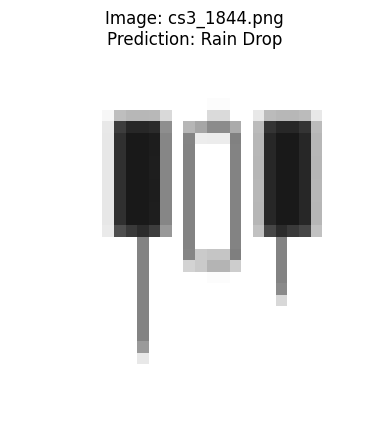

1/1 [==============================] - 0s 41ms/step


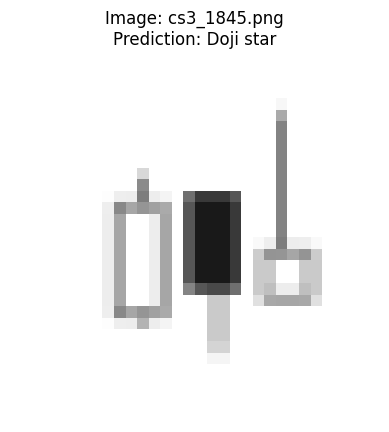

1/1 [==============================] - 0s 36ms/step


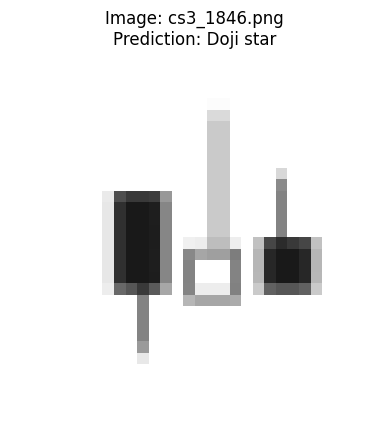

1/1 [==============================] - 0s 52ms/step


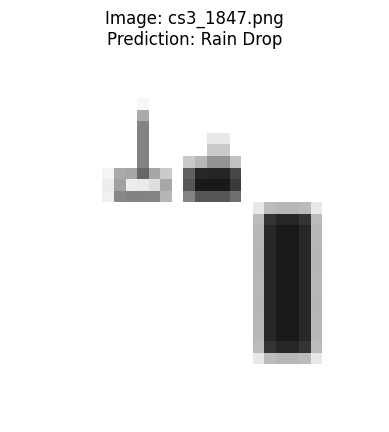

1/1 [==============================] - 0s 21ms/step


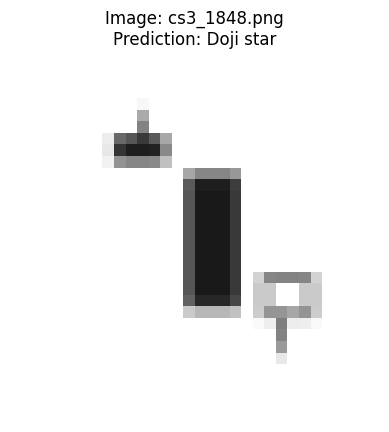

1/1 [==============================] - 0s 22ms/step


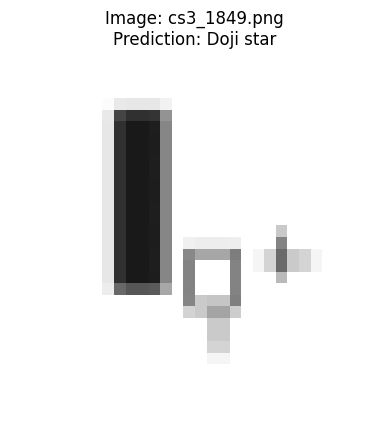

1/1 [==============================] - 0s 22ms/step


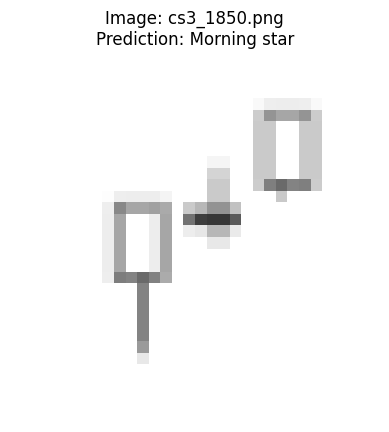

1/1 [==============================] - 0s 24ms/step


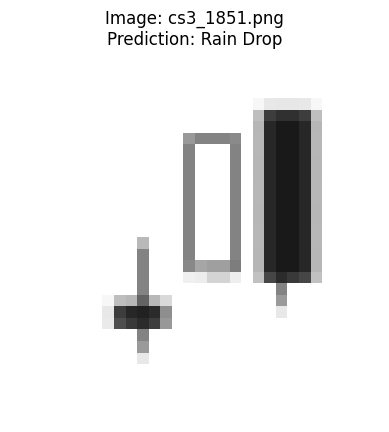

1/1 [==============================] - 0s 22ms/step


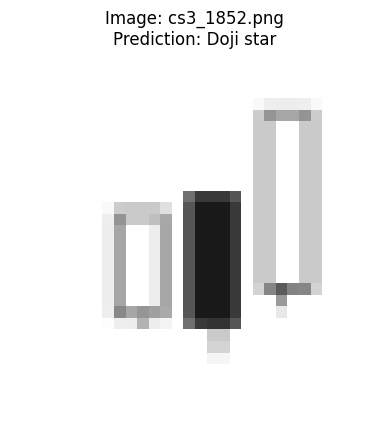

1/1 [==============================] - 0s 20ms/step


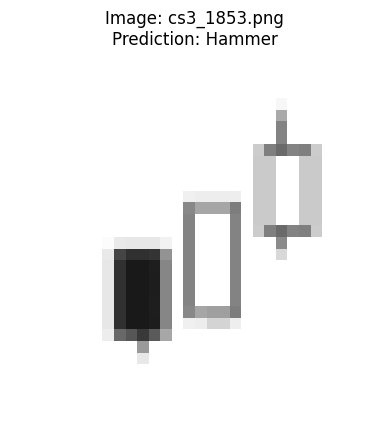

1/1 [==============================] - 0s 21ms/step


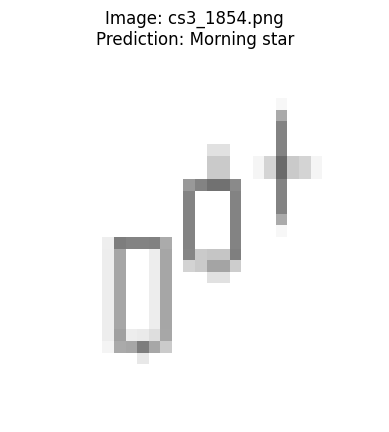

1/1 [==============================] - 0s 22ms/step


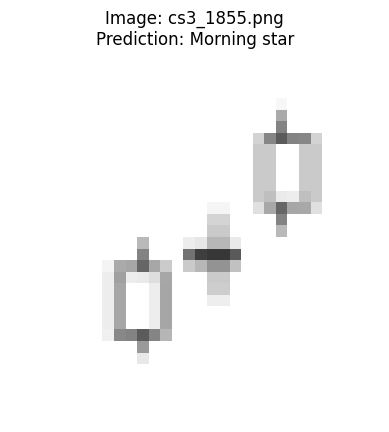

1/1 [==============================] - 0s 24ms/step


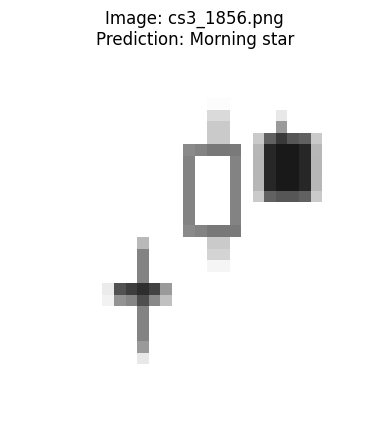

1/1 [==============================] - 0s 25ms/step


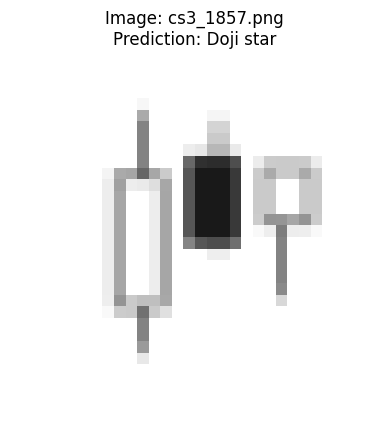

1/1 [==============================] - 0s 22ms/step


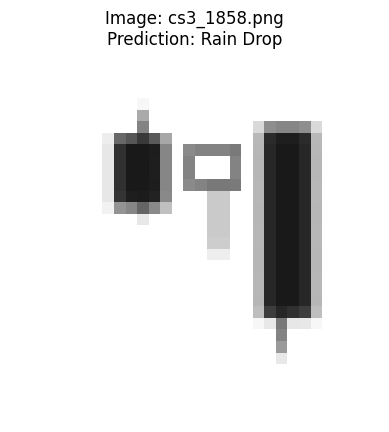

1/1 [==============================] - 0s 22ms/step


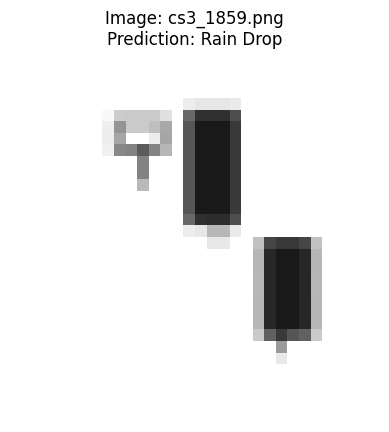

1/1 [==============================] - 0s 21ms/step


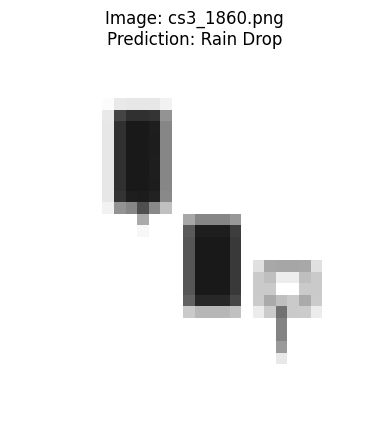

1/1 [==============================] - 0s 21ms/step


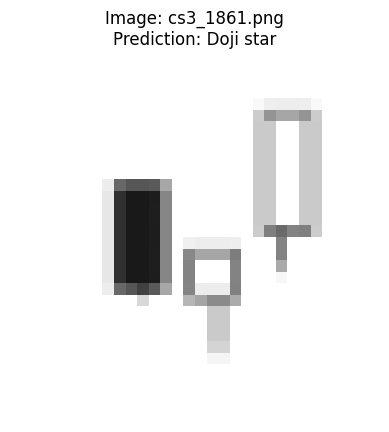

1/1 [==============================] - 0s 22ms/step


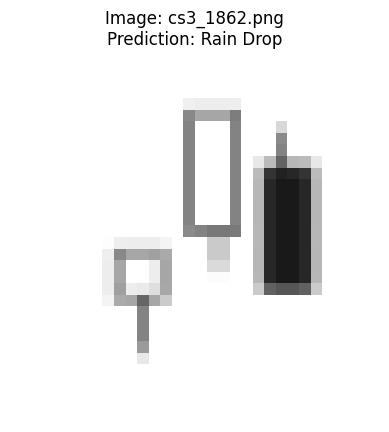

1/1 [==============================] - 0s 21ms/step


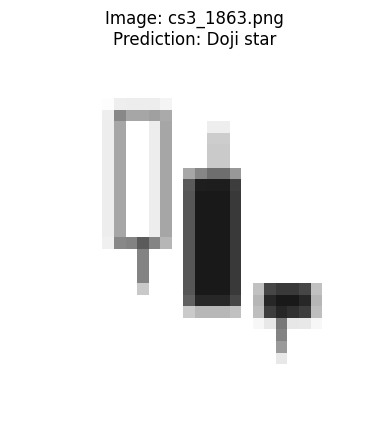

1/1 [==============================] - 0s 22ms/step


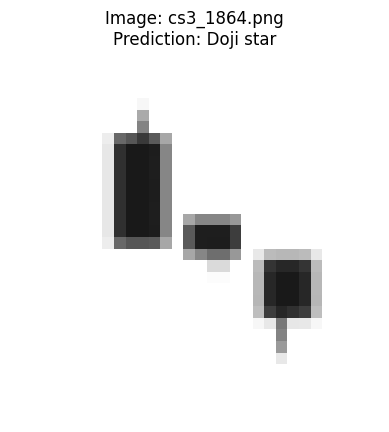

1/1 [==============================] - 0s 25ms/step


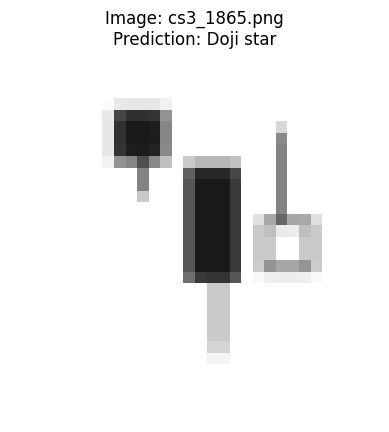

1/1 [==============================] - 0s 24ms/step


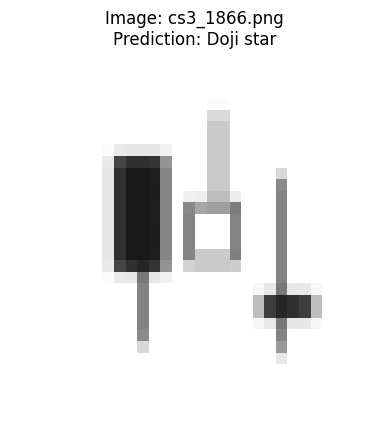

1/1 [==============================] - 0s 20ms/step


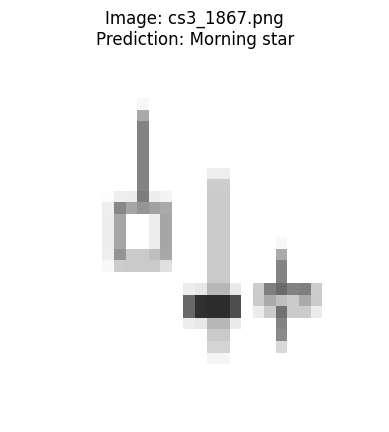

1/1 [==============================] - 0s 20ms/step


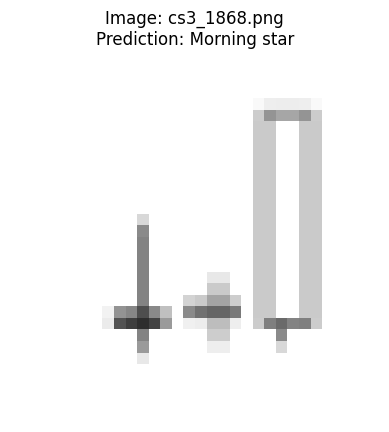

1/1 [==============================] - 0s 20ms/step


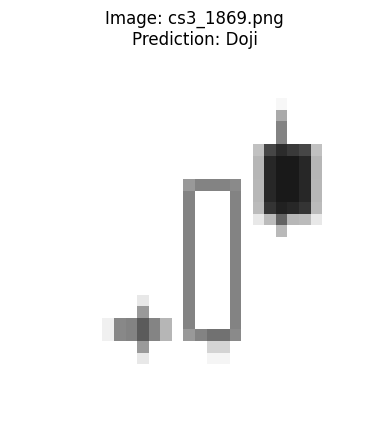

1/1 [==============================] - 0s 21ms/step


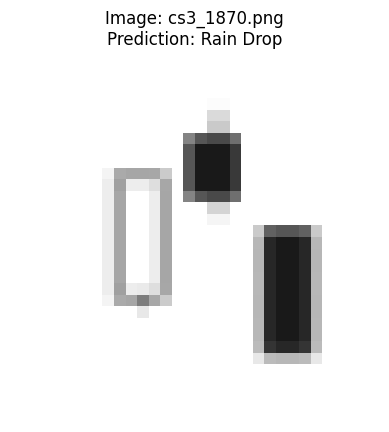

1/1 [==============================] - 0s 21ms/step


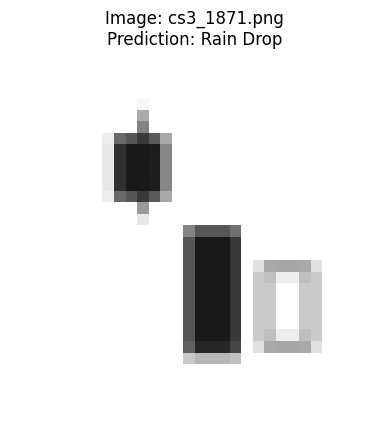

1/1 [==============================] - 0s 21ms/step


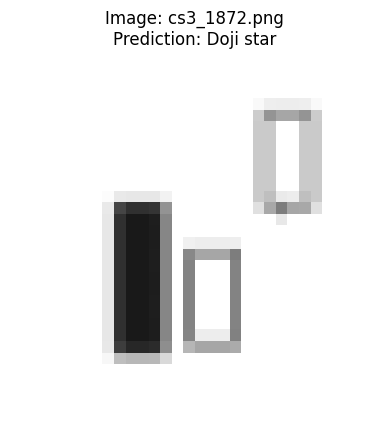

1/1 [==============================] - 0s 20ms/step


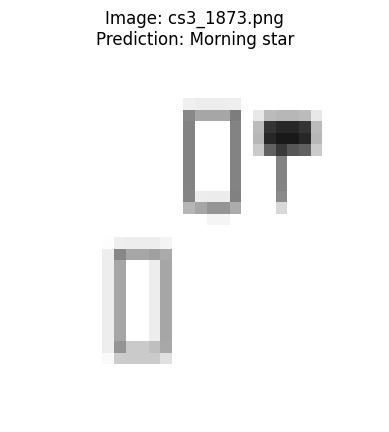

1/1 [==============================] - 0s 22ms/step


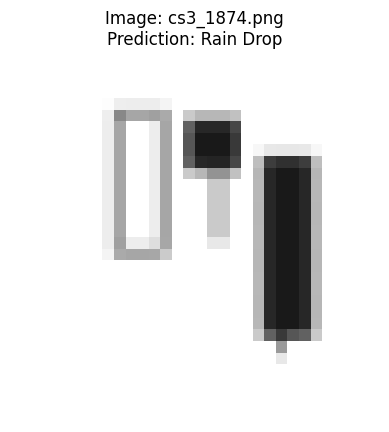

1/1 [==============================] - 0s 23ms/step


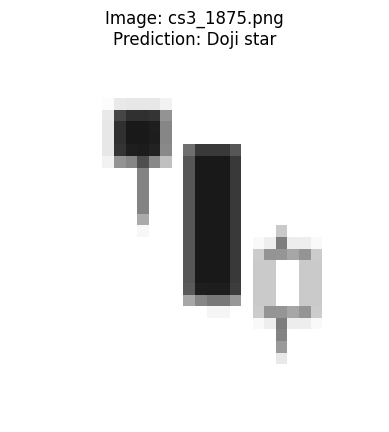

1/1 [==============================] - 0s 21ms/step


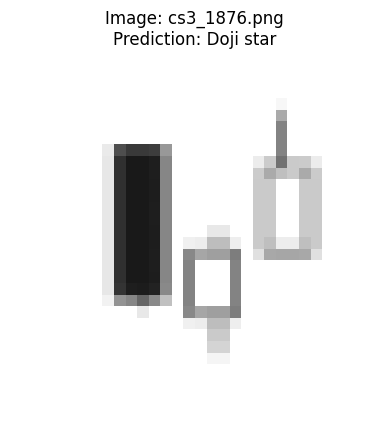

1/1 [==============================] - 0s 19ms/step


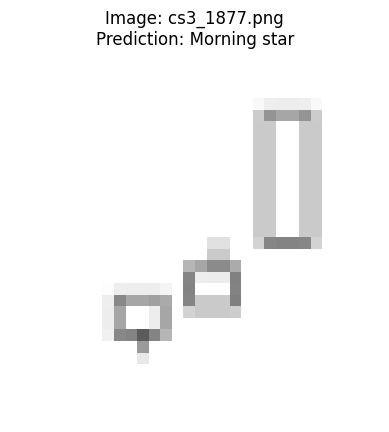

1/1 [==============================] - 0s 22ms/step


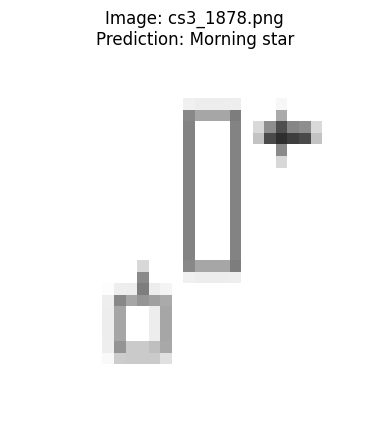

1/1 [==============================] - 0s 20ms/step


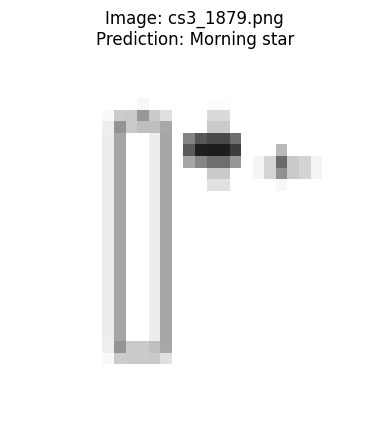

1/1 [==============================] - 0s 25ms/step


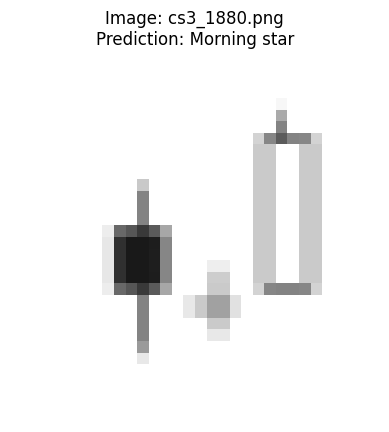

1/1 [==============================] - 0s 23ms/step


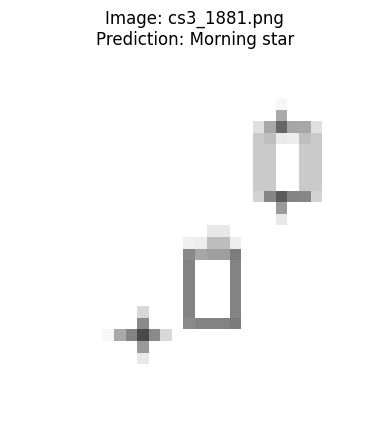

1/1 [==============================] - 0s 21ms/step


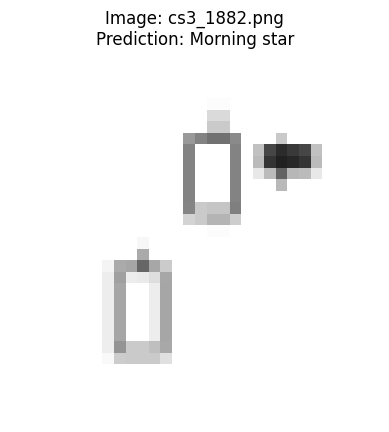

1/1 [==============================] - 0s 22ms/step


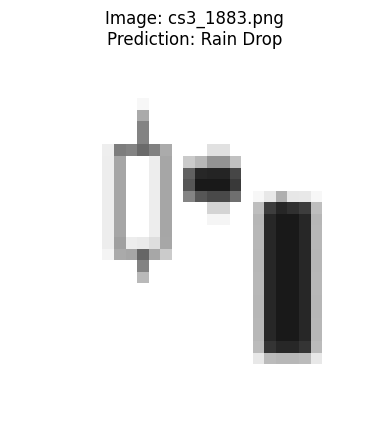

1/1 [==============================] - 0s 21ms/step


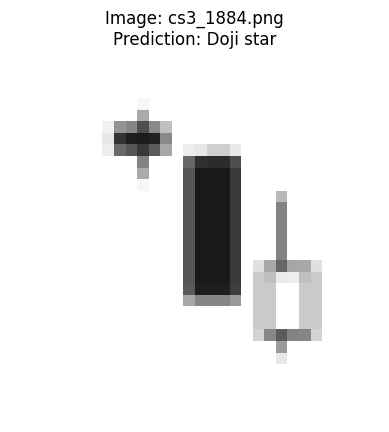

1/1 [==============================] - 0s 21ms/step


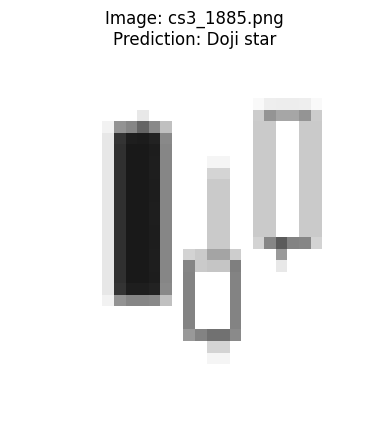

1/1 [==============================] - 0s 21ms/step


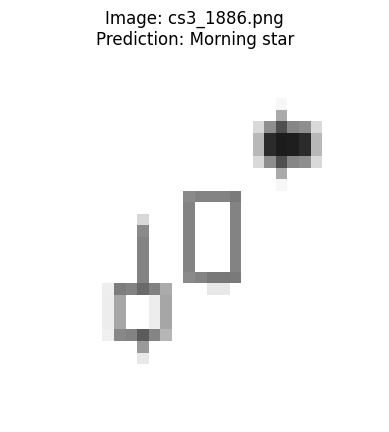

1/1 [==============================] - 0s 20ms/step


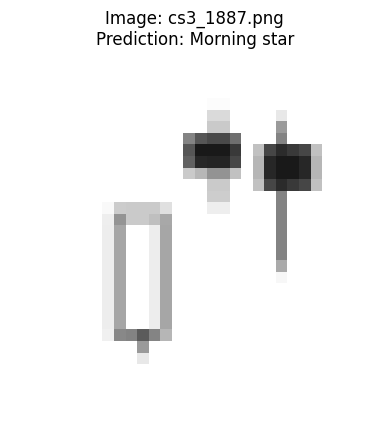

1/1 [==============================] - 0s 20ms/step


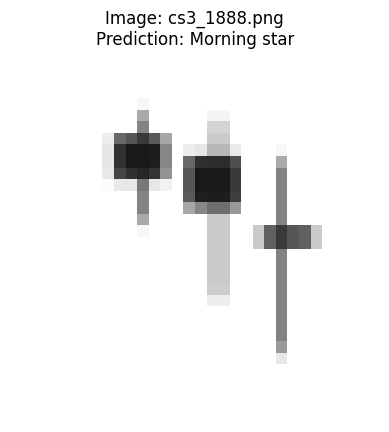

1/1 [==============================] - 0s 21ms/step


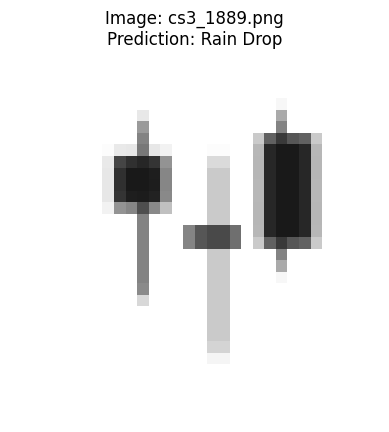

1/1 [==============================] - 0s 21ms/step


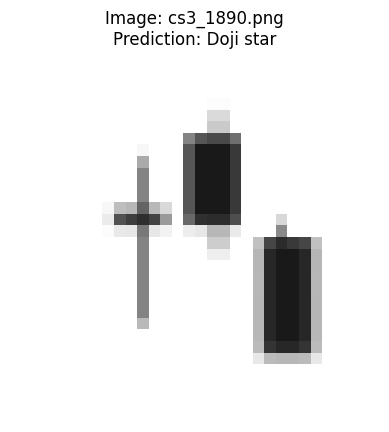

1/1 [==============================] - 0s 20ms/step


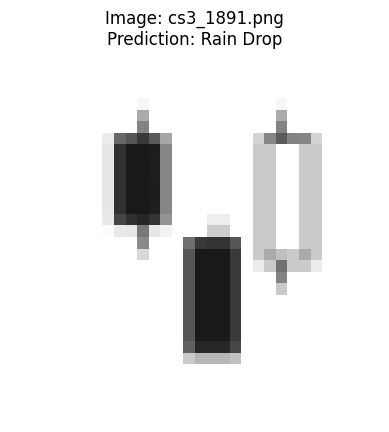

1/1 [==============================] - 0s 33ms/step


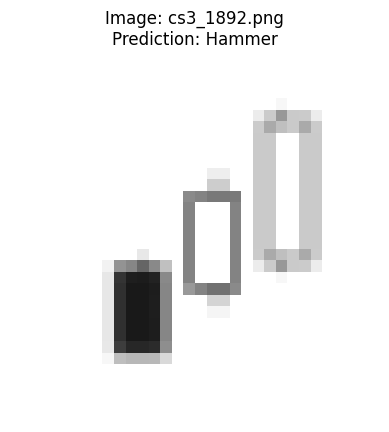

1/1 [==============================] - 0s 33ms/step


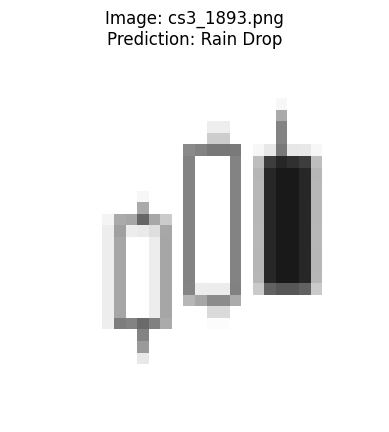

1/1 [==============================] - 0s 35ms/step


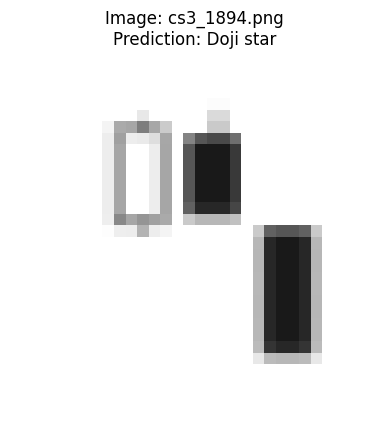

1/1 [==============================] - 0s 32ms/step


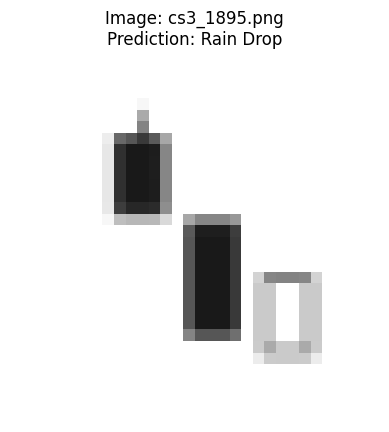

1/1 [==============================] - 0s 44ms/step


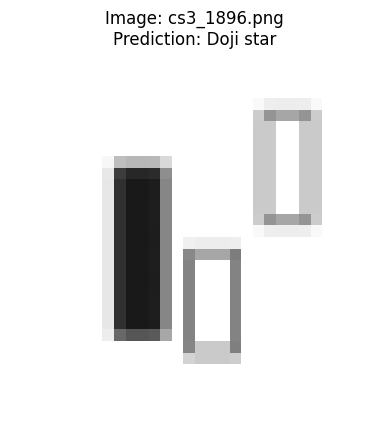

1/1 [==============================] - 0s 31ms/step


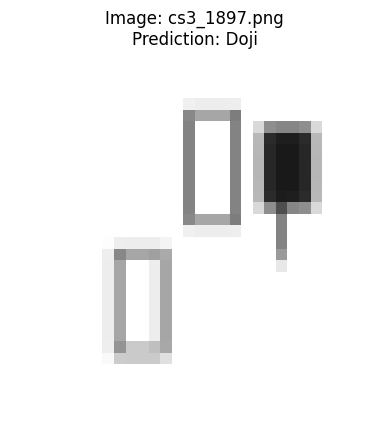

1/1 [==============================] - 0s 35ms/step


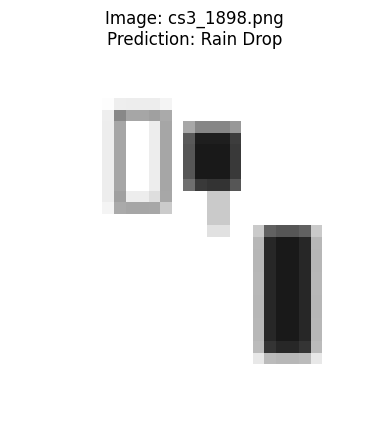

1/1 [==============================] - 0s 44ms/step


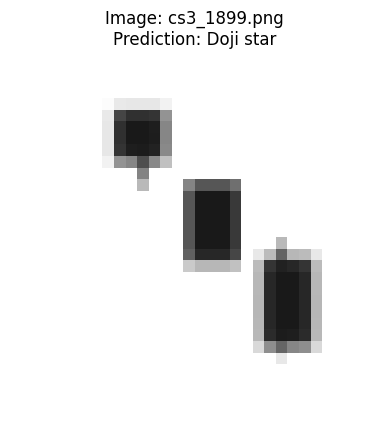

1/1 [==============================] - 0s 35ms/step


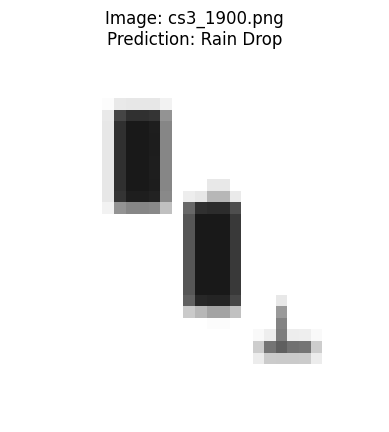

1/1 [==============================] - 0s 33ms/step


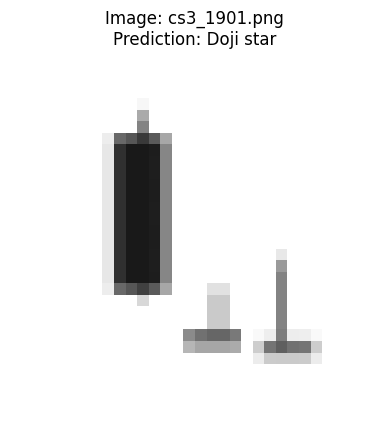

1/1 [==============================] - 0s 38ms/step


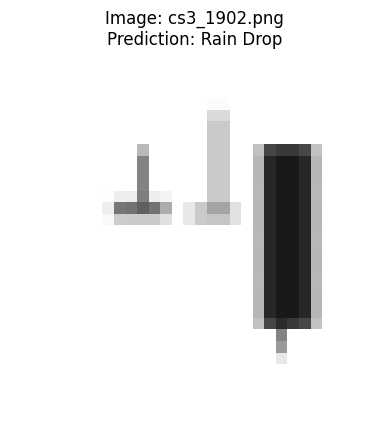

1/1 [==============================] - 0s 33ms/step


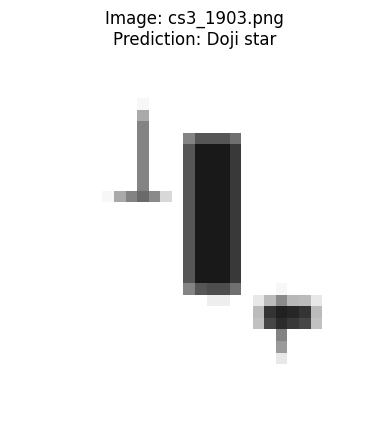

1/1 [==============================] - 0s 35ms/step


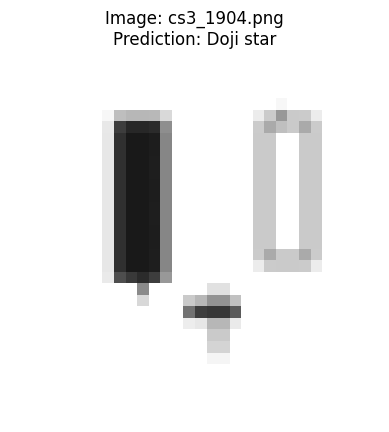

1/1 [==============================] - 0s 37ms/step


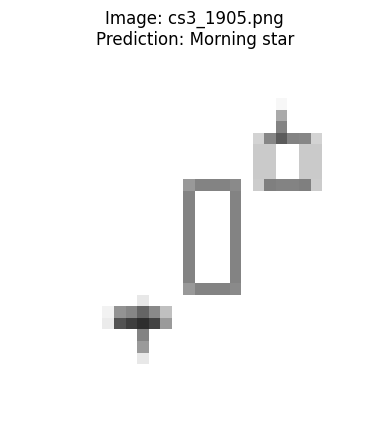

1/1 [==============================] - 0s 20ms/step


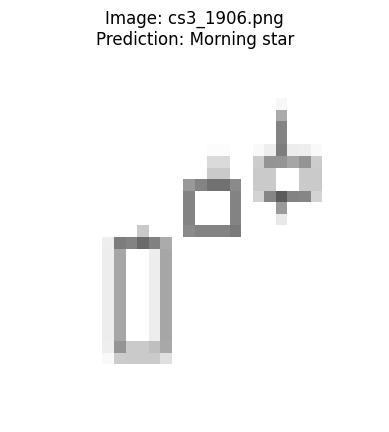

1/1 [==============================] - 0s 20ms/step


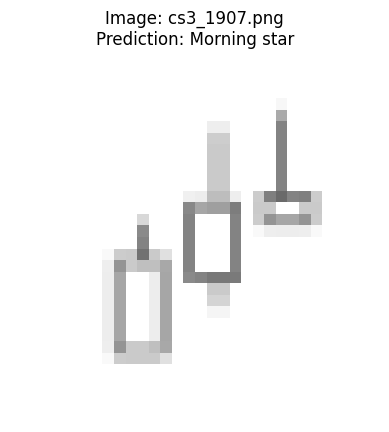

1/1 [==============================] - 0s 20ms/step


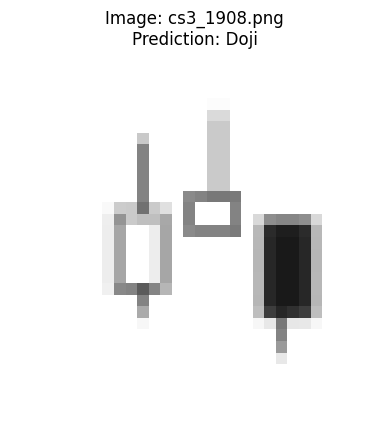

1/1 [==============================] - 0s 21ms/step


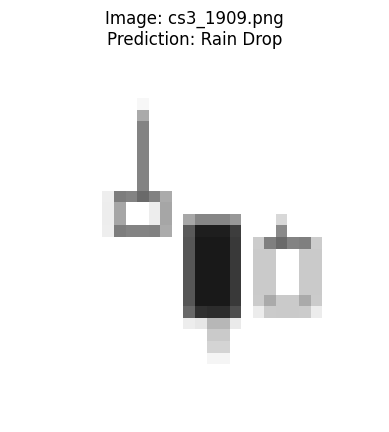

1/1 [==============================] - 0s 21ms/step


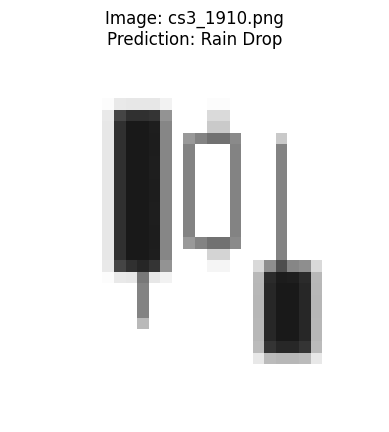

1/1 [==============================] - 0s 21ms/step


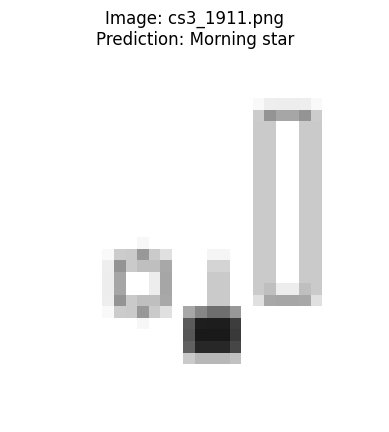

1/1 [==============================] - 0s 20ms/step


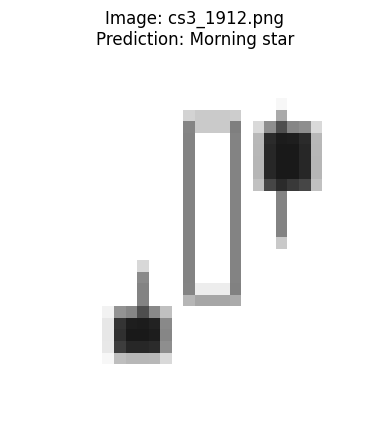

1/1 [==============================] - 0s 20ms/step


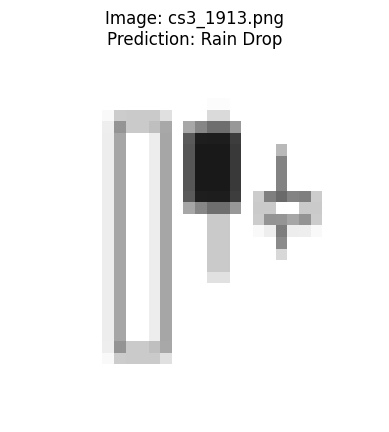

1/1 [==============================] - 0s 23ms/step


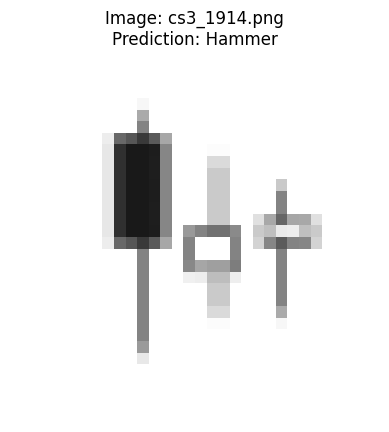

1/1 [==============================] - 0s 21ms/step


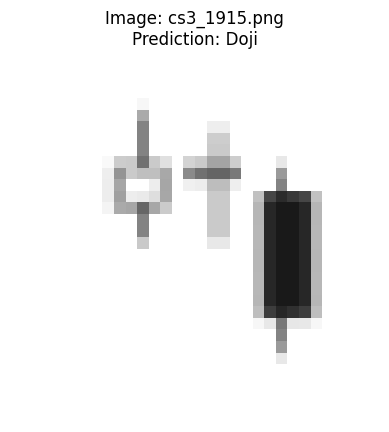

1/1 [==============================] - 0s 21ms/step


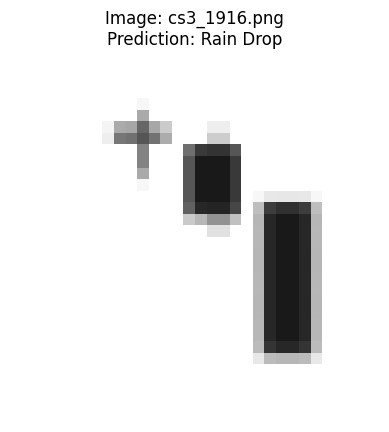

1/1 [==============================] - 0s 23ms/step


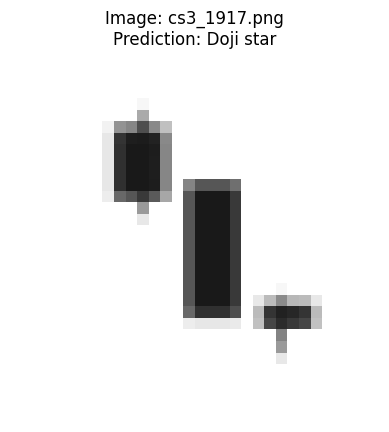

1/1 [==============================] - 0s 20ms/step


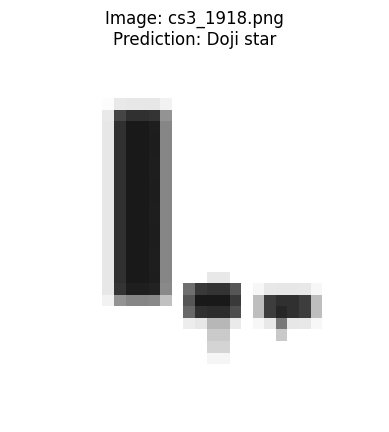

1/1 [==============================] - 0s 21ms/step


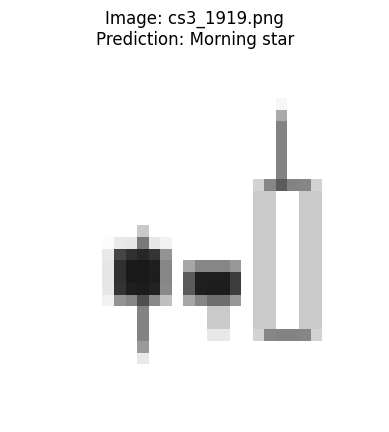

1/1 [==============================] - 0s 20ms/step


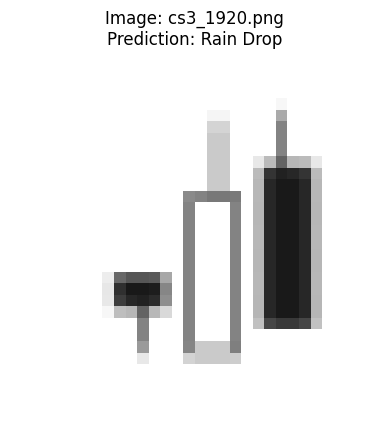

1/1 [==============================] - 0s 21ms/step


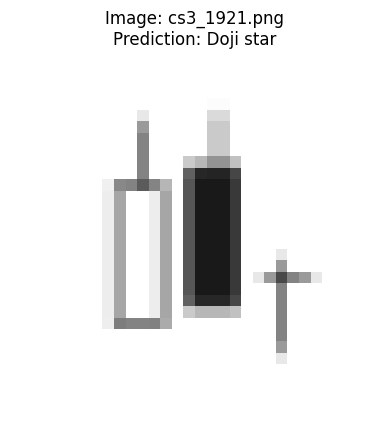

1/1 [==============================] - 0s 21ms/step


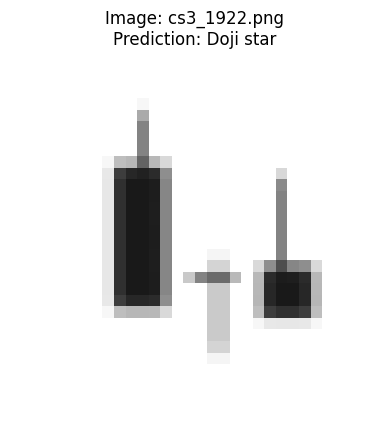

1/1 [==============================] - 0s 20ms/step


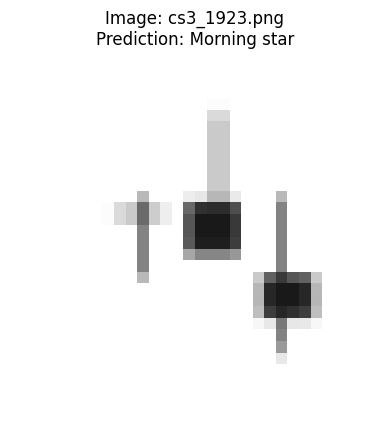

1/1 [==============================] - 0s 21ms/step


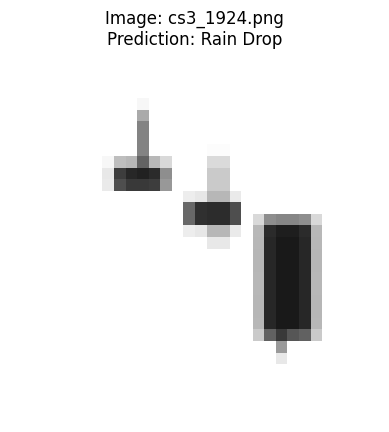

1/1 [==============================] - 0s 20ms/step


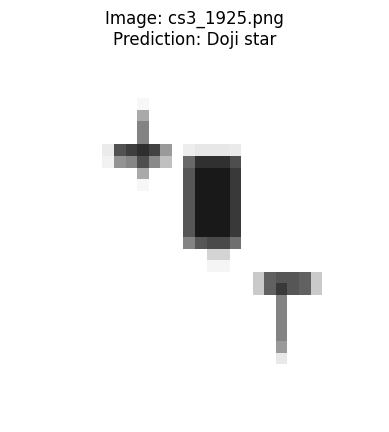

1/1 [==============================] - 0s 19ms/step


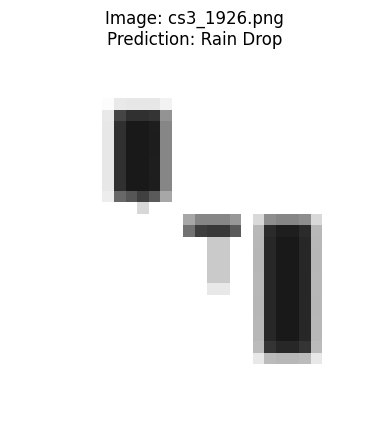

1/1 [==============================] - 0s 20ms/step


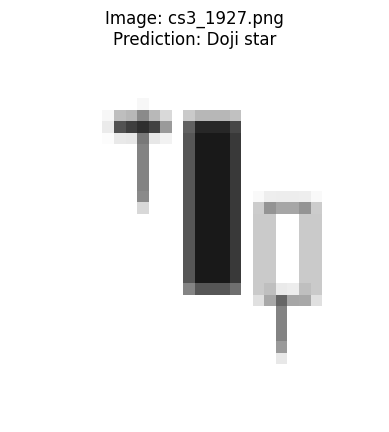

1/1 [==============================] - 0s 31ms/step


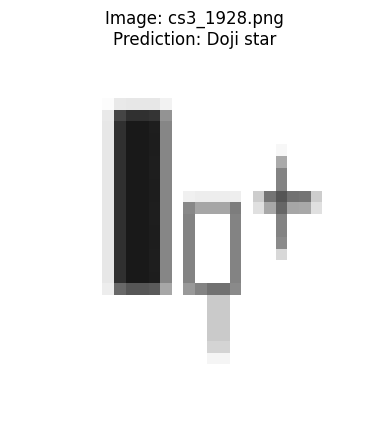

1/1 [==============================] - 0s 21ms/step


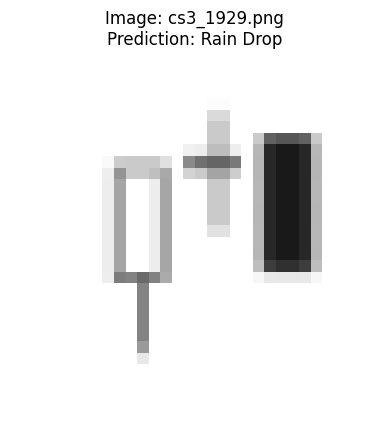

1/1 [==============================] - 0s 19ms/step


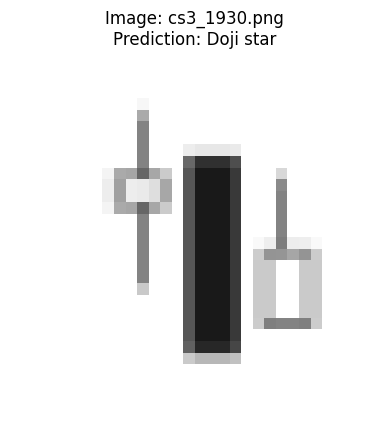

1/1 [==============================] - 0s 20ms/step


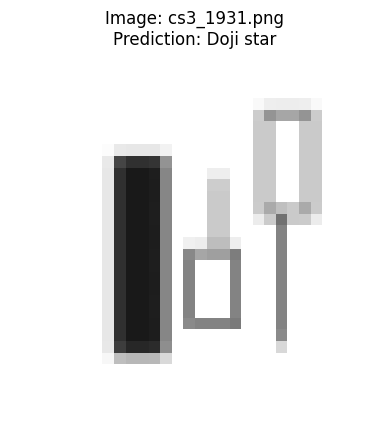

1/1 [==============================] - 0s 21ms/step


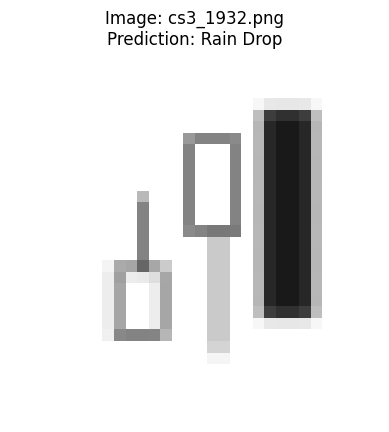

1/1 [==============================] - 0s 21ms/step


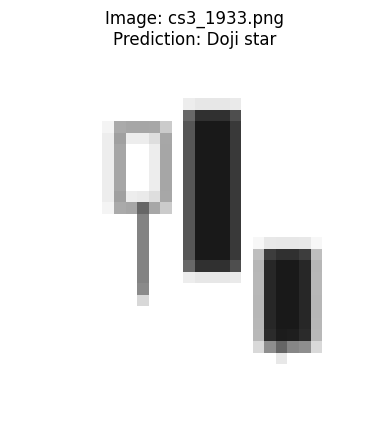

1/1 [==============================] - 0s 23ms/step


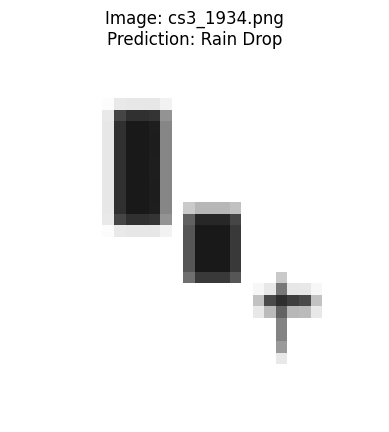

1/1 [==============================] - 0s 21ms/step


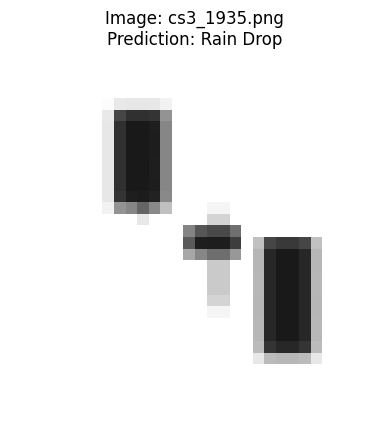

1/1 [==============================] - 0s 21ms/step


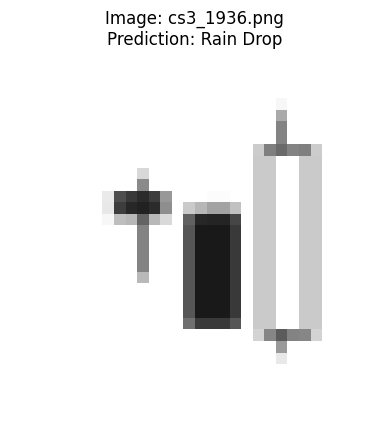

1/1 [==============================] - 0s 21ms/step


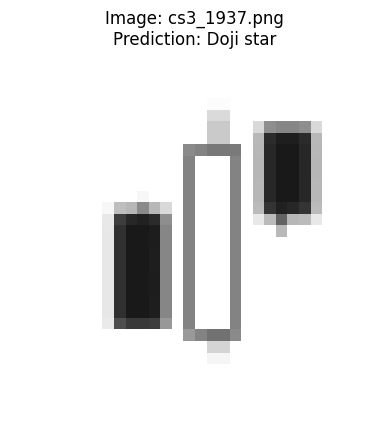

1/1 [==============================] - 0s 20ms/step


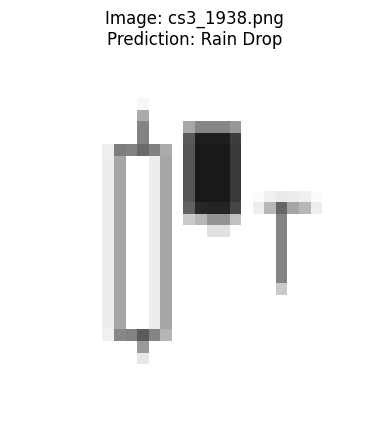

1/1 [==============================] - 0s 23ms/step


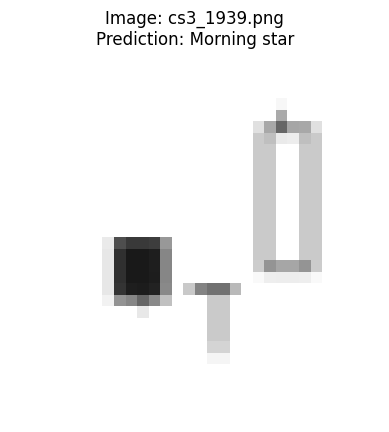

1/1 [==============================] - 0s 20ms/step


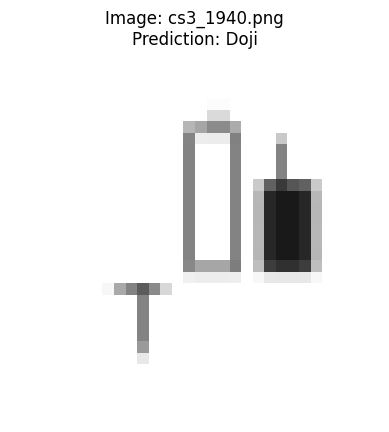

1/1 [==============================] - 0s 30ms/step


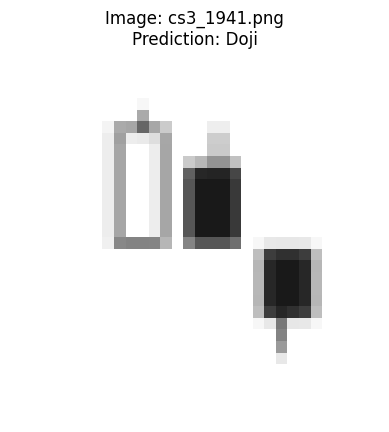

1/1 [==============================] - 0s 22ms/step


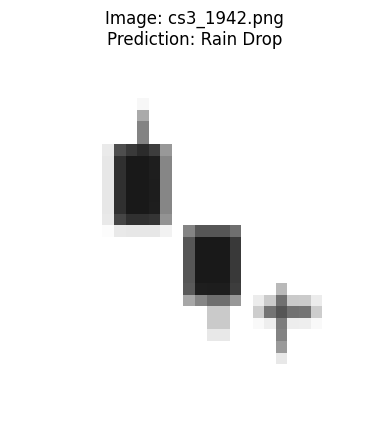

1/1 [==============================] - 0s 21ms/step


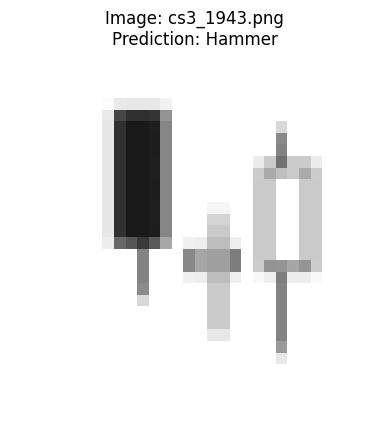

1/1 [==============================] - 0s 20ms/step


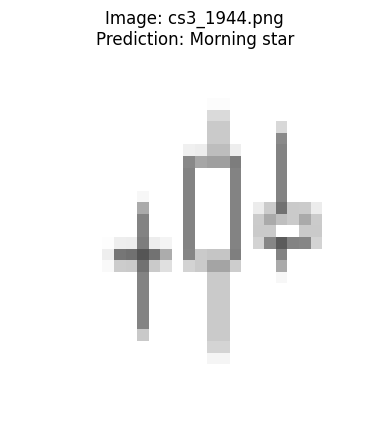

1/1 [==============================] - 0s 21ms/step


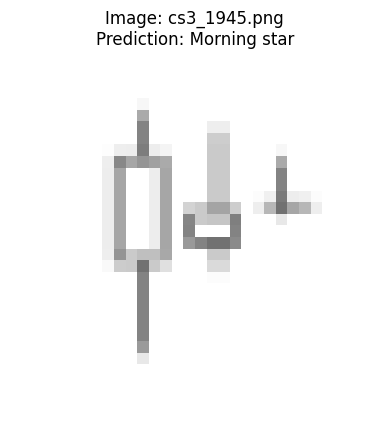

1/1 [==============================] - 0s 20ms/step


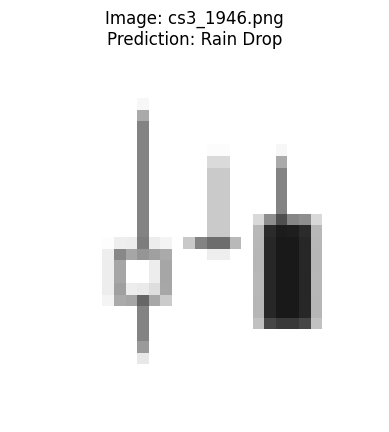

1/1 [==============================] - 0s 22ms/step


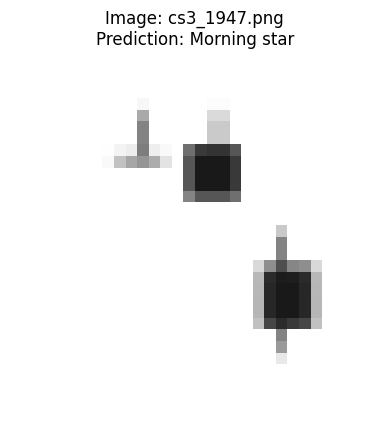

1/1 [==============================] - 0s 32ms/step


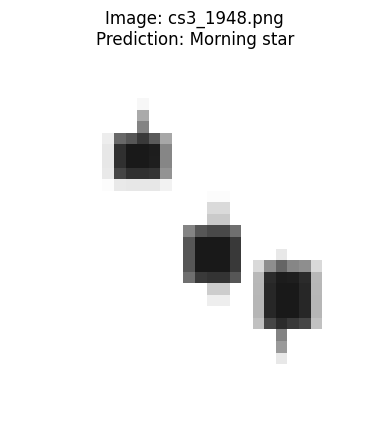

1/1 [==============================] - 0s 32ms/step


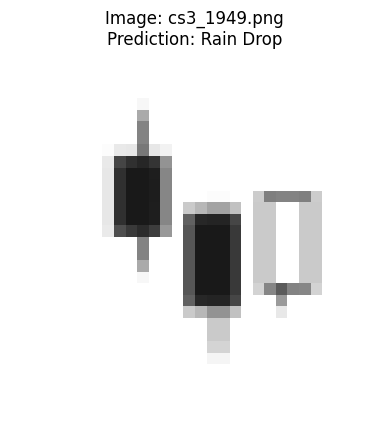

1/1 [==============================] - 0s 28ms/step


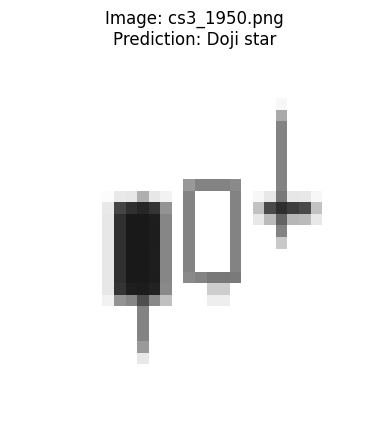

1/1 [==============================] - 0s 35ms/step


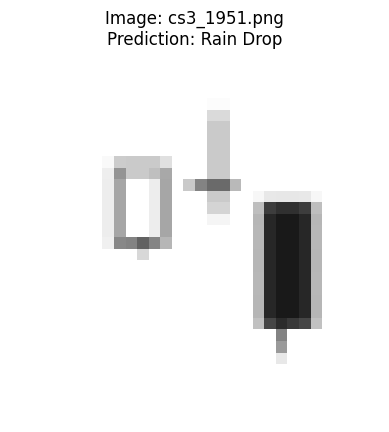

1/1 [==============================] - 0s 31ms/step


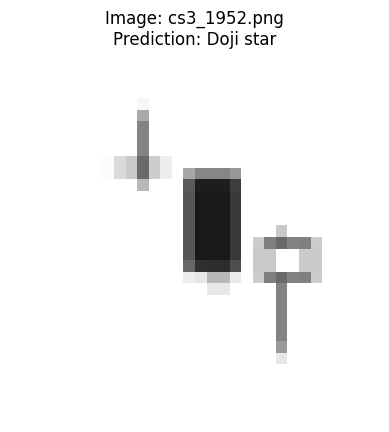

1/1 [==============================] - 0s 43ms/step


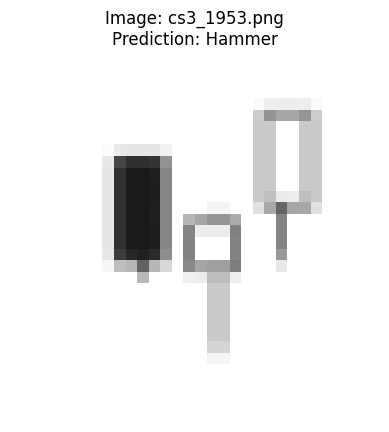

1/1 [==============================] - 0s 33ms/step


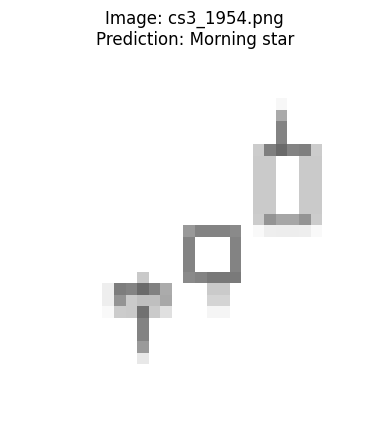

1/1 [==============================] - 0s 30ms/step


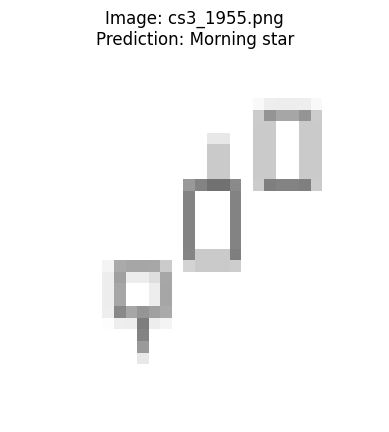

1/1 [==============================] - 0s 33ms/step


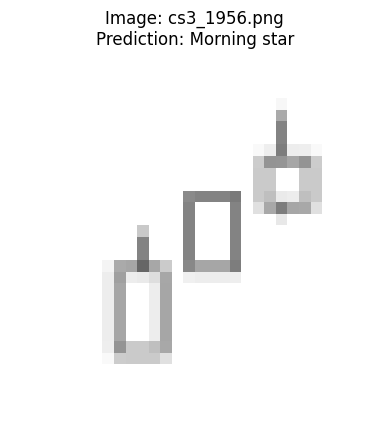

1/1 [==============================] - 0s 30ms/step


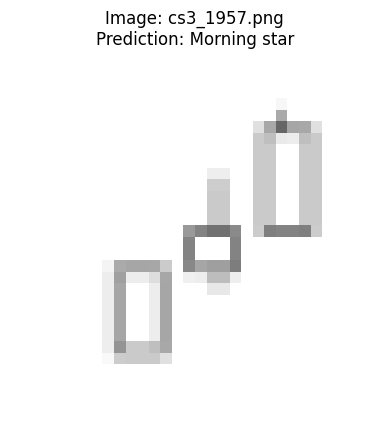

1/1 [==============================] - 0s 29ms/step


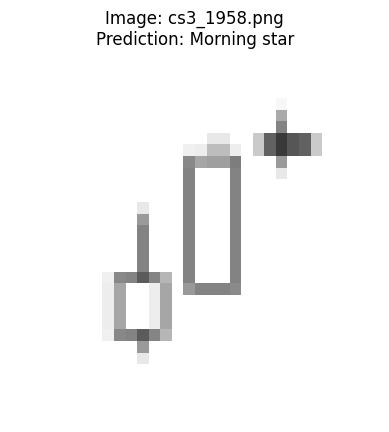

1/1 [==============================] - 0s 29ms/step


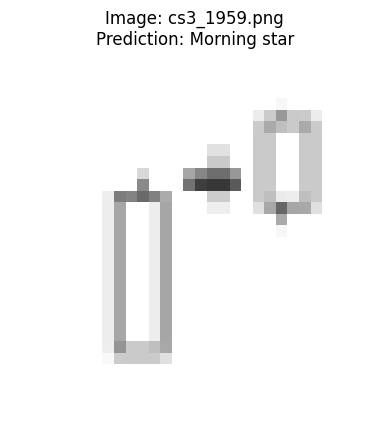

1/1 [==============================] - 0s 38ms/step


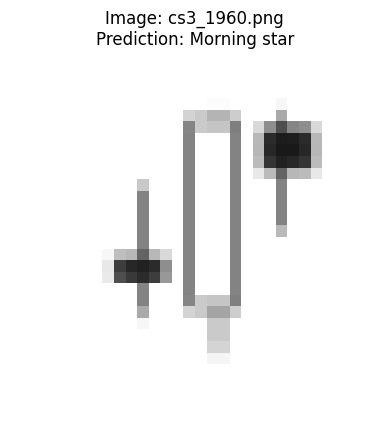

1/1 [==============================] - 0s 40ms/step


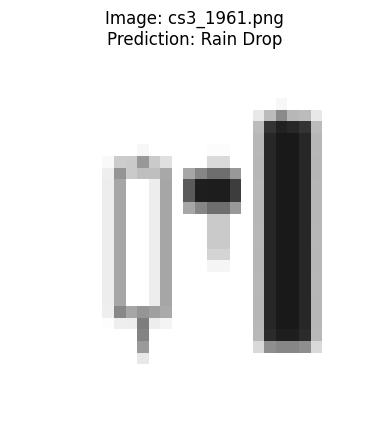

1/1 [==============================] - 0s 35ms/step


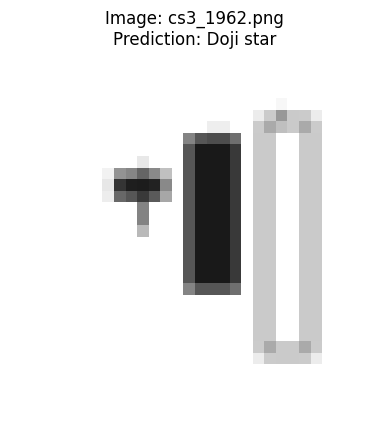

1/1 [==============================] - 0s 38ms/step


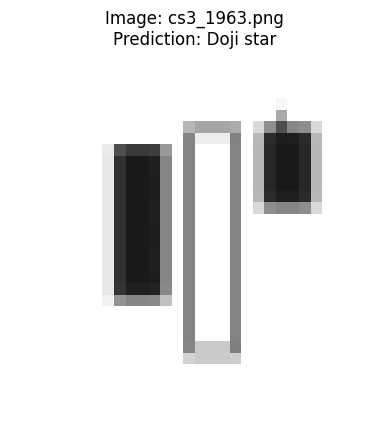

1/1 [==============================] - 0s 37ms/step


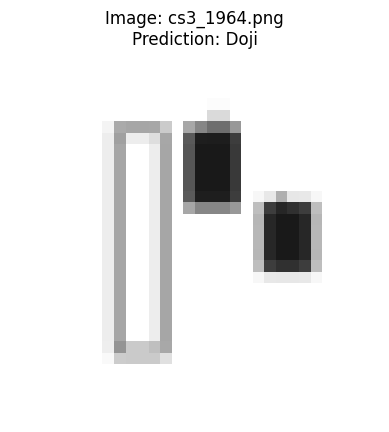

1/1 [==============================] - 0s 23ms/step


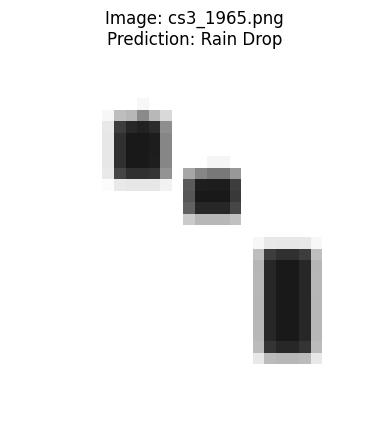

1/1 [==============================] - 0s 20ms/step


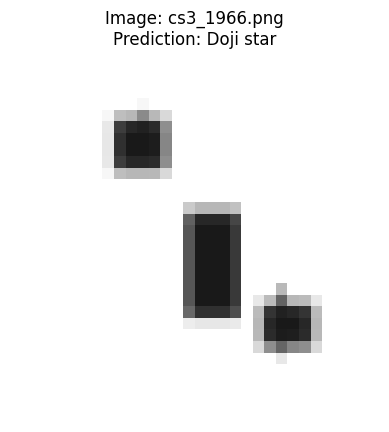

1/1 [==============================] - 0s 22ms/step


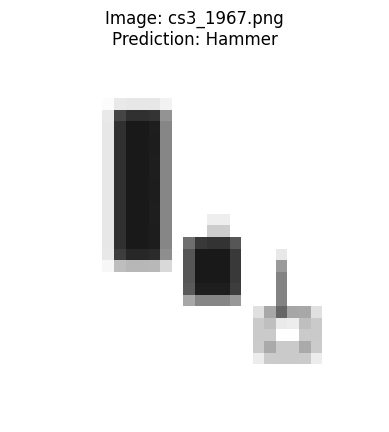

1/1 [==============================] - 0s 19ms/step


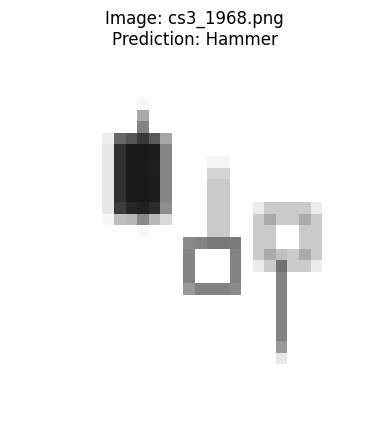

1/1 [==============================] - 0s 24ms/step


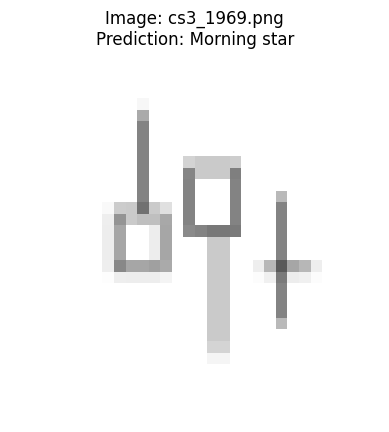

1/1 [==============================] - 0s 20ms/step


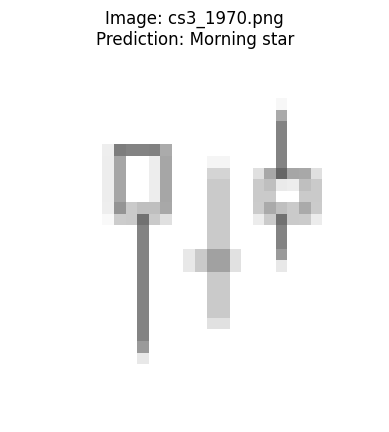

1/1 [==============================] - 0s 22ms/step


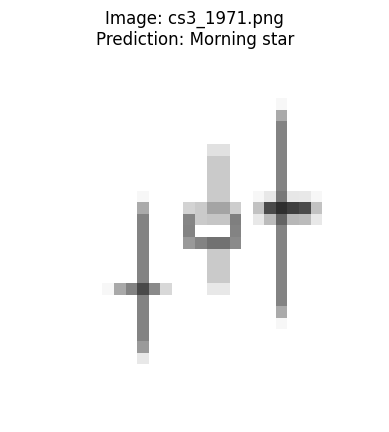

1/1 [==============================] - 0s 21ms/step


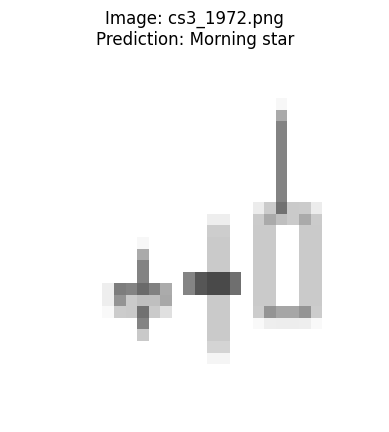

1/1 [==============================] - 0s 21ms/step


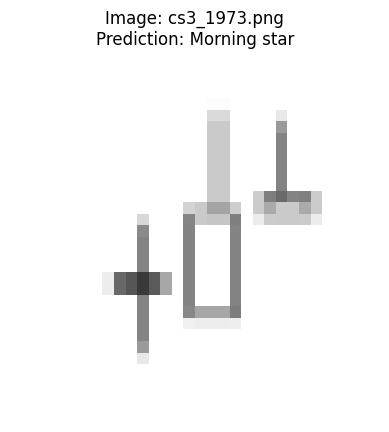

1/1 [==============================] - 0s 20ms/step


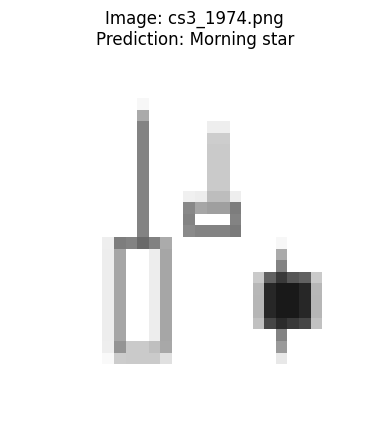

1/1 [==============================] - 0s 23ms/step


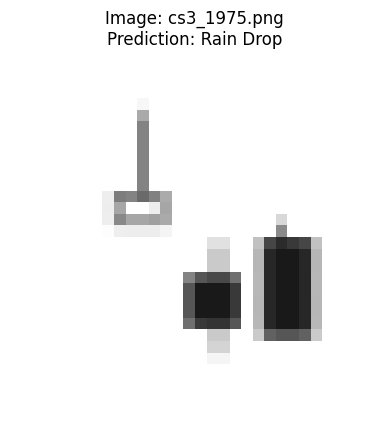

1/1 [==============================] - 0s 22ms/step


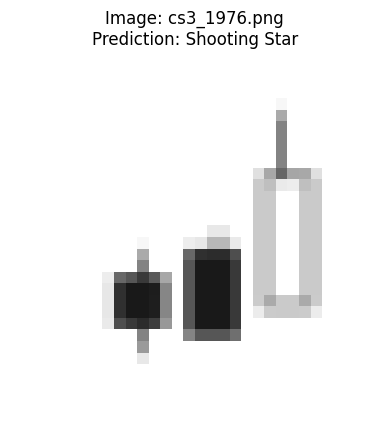

1/1 [==============================] - 0s 21ms/step


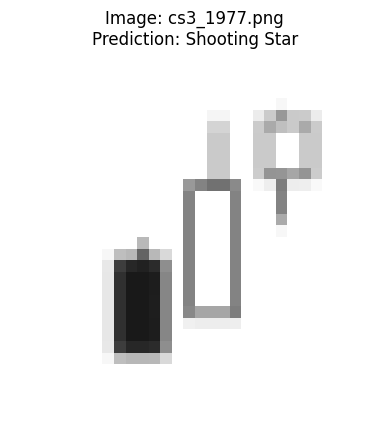

1/1 [==============================] - 0s 20ms/step


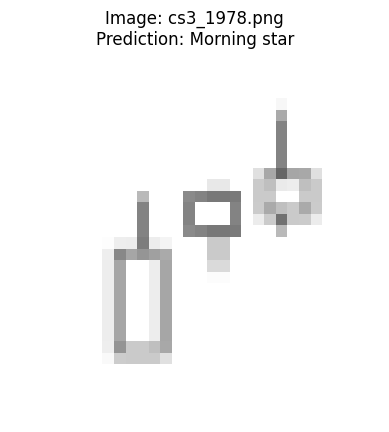

1/1 [==============================] - 0s 21ms/step


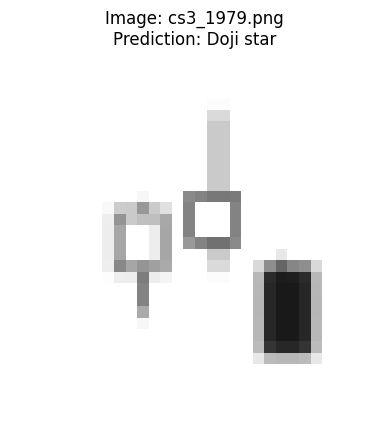

1/1 [==============================] - 0s 21ms/step


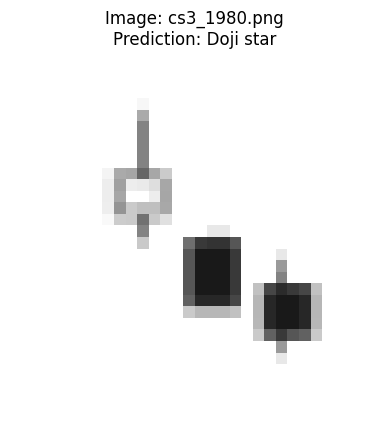

1/1 [==============================] - 0s 21ms/step


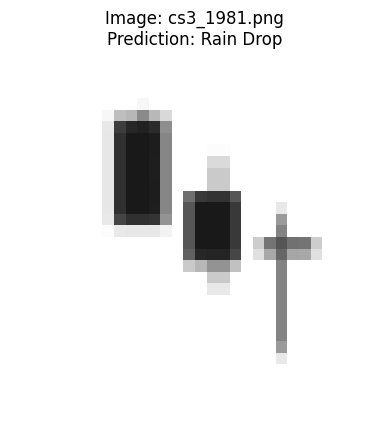

1/1 [==============================] - 0s 27ms/step


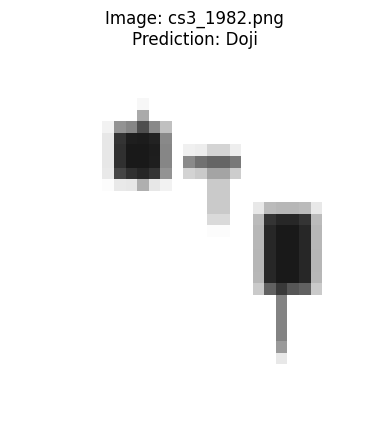

1/1 [==============================] - 0s 20ms/step


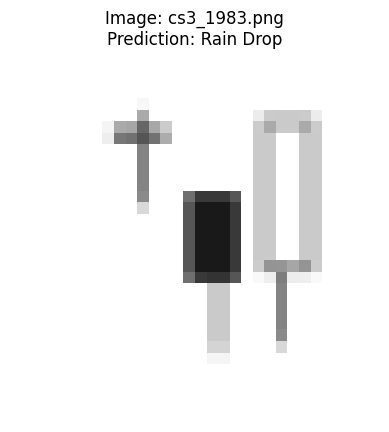

1/1 [==============================] - 0s 21ms/step


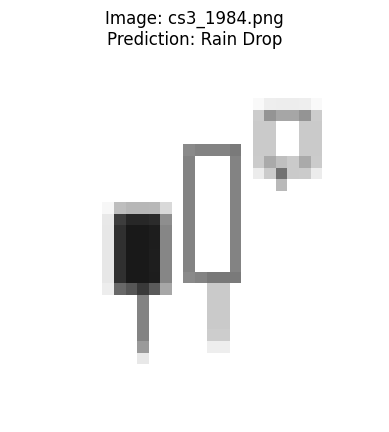

1/1 [==============================] - 0s 20ms/step


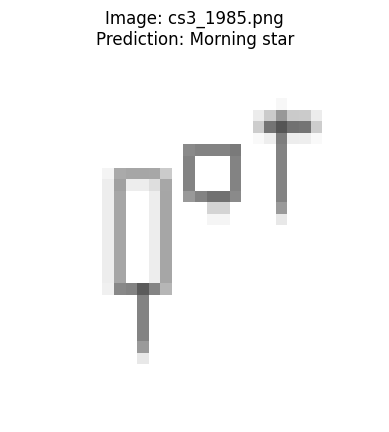

1/1 [==============================] - 0s 21ms/step


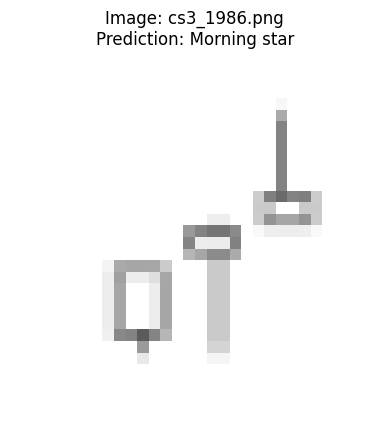

1/1 [==============================] - 0s 20ms/step


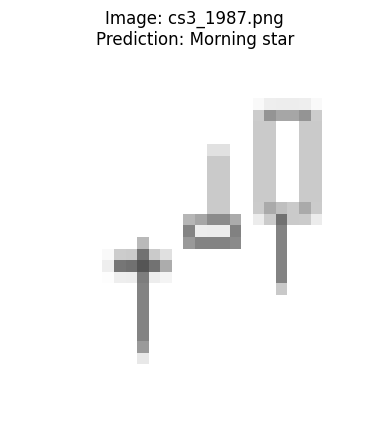

1/1 [==============================] - 0s 23ms/step


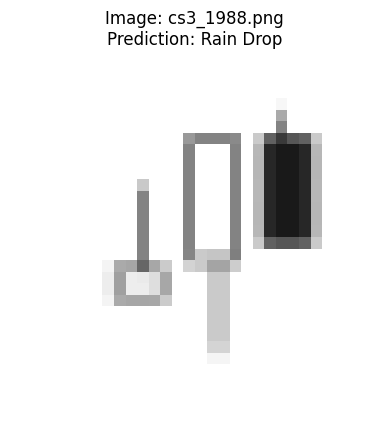

1/1 [==============================] - 0s 21ms/step


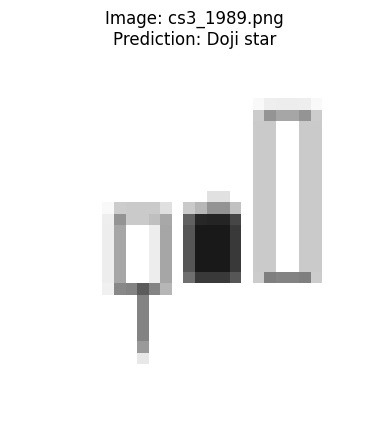

1/1 [==============================] - 0s 24ms/step


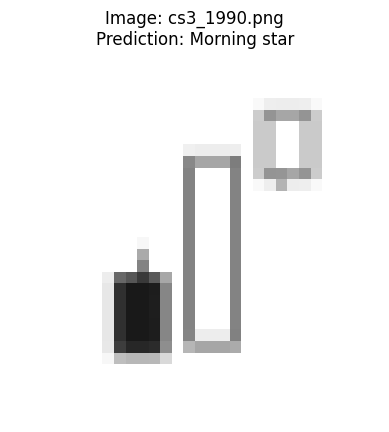

1/1 [==============================] - 0s 21ms/step


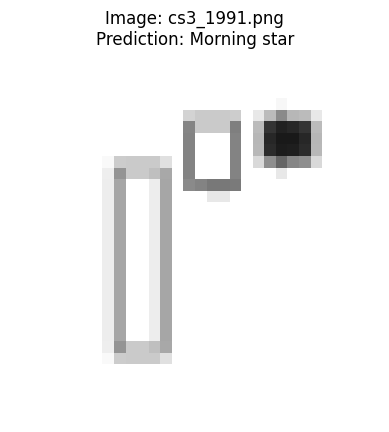

1/1 [==============================] - 0s 21ms/step


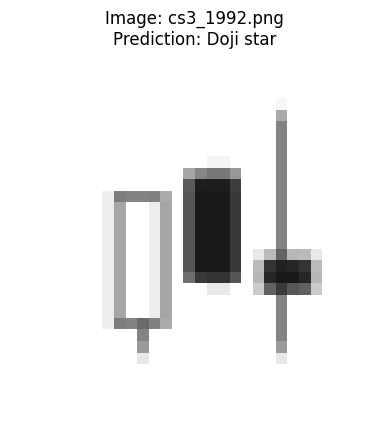

1/1 [==============================] - 0s 23ms/step


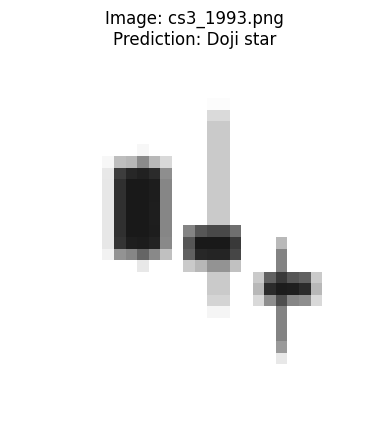

1/1 [==============================] - 0s 20ms/step


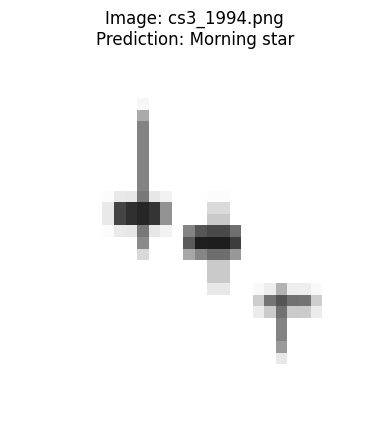

1/1 [==============================] - 0s 20ms/step


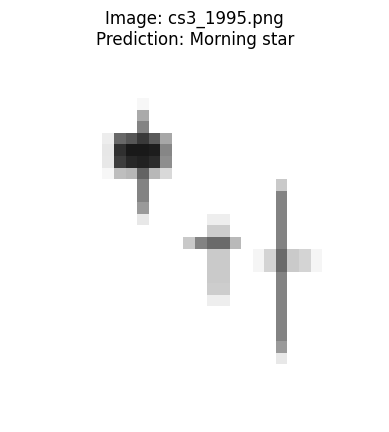

1/1 [==============================] - 0s 21ms/step


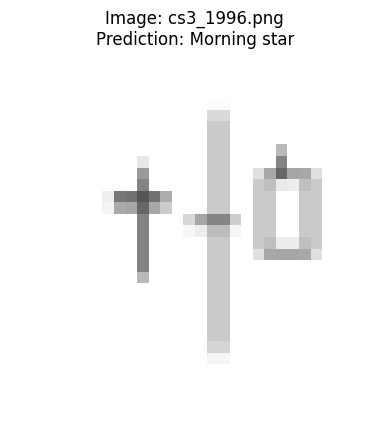

1/1 [==============================] - 0s 20ms/step


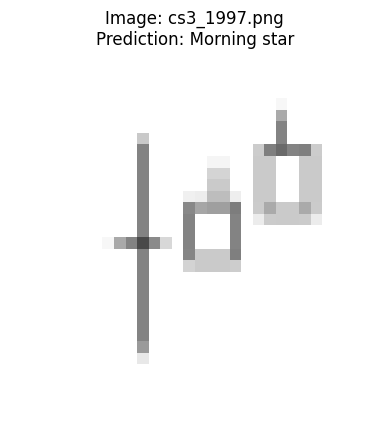

1/1 [==============================] - 0s 25ms/step


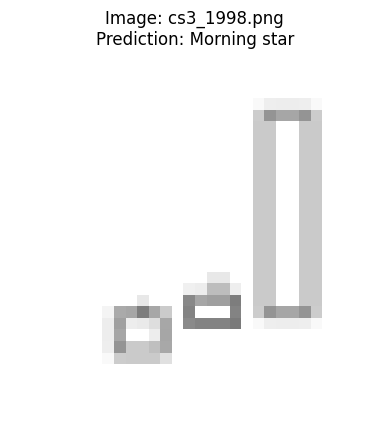

1/1 [==============================] - 0s 21ms/step


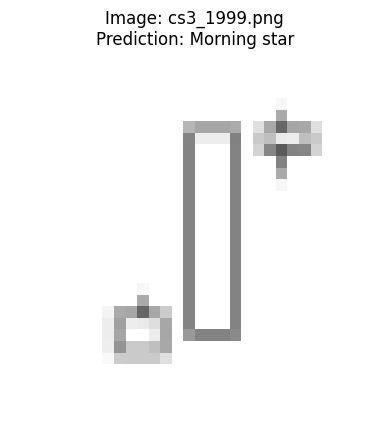

1/1 [==============================] - 0s 21ms/step


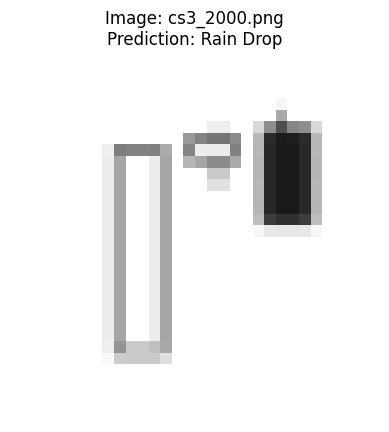

1/1 [==============================] - 0s 21ms/step


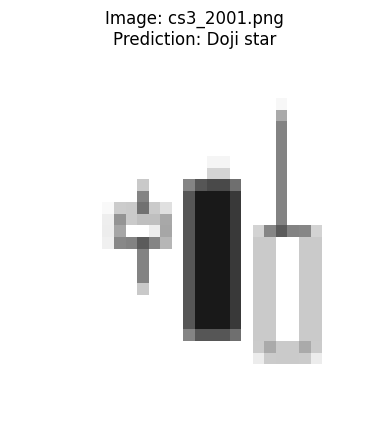

1/1 [==============================] - 0s 22ms/step


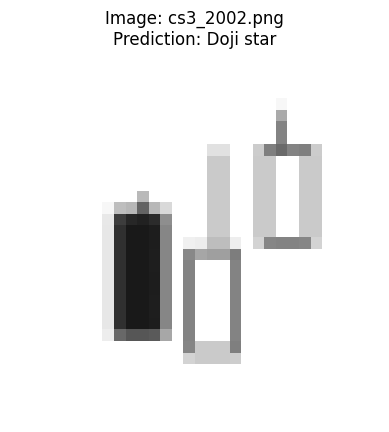

1/1 [==============================] - 0s 21ms/step


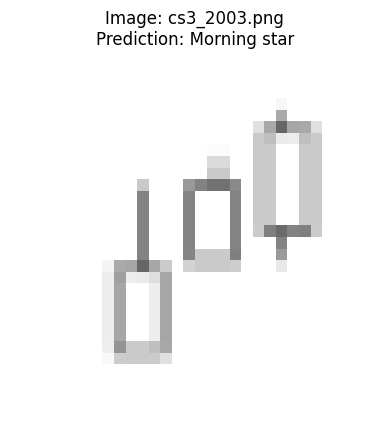

1/1 [==============================] - 0s 21ms/step


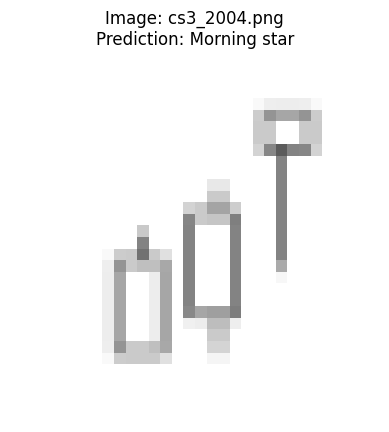

1/1 [==============================] - 0s 34ms/step


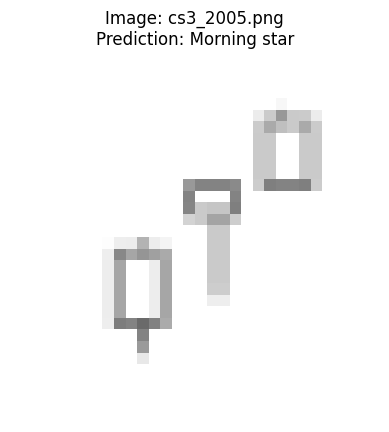

1/1 [==============================] - 0s 35ms/step


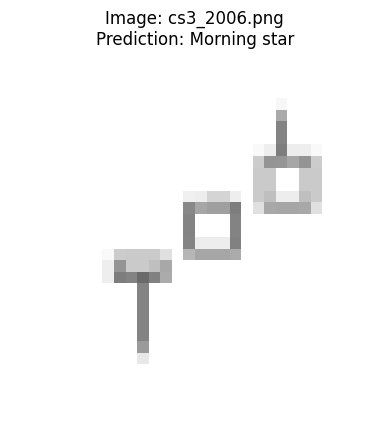

1/1 [==============================] - 0s 30ms/step


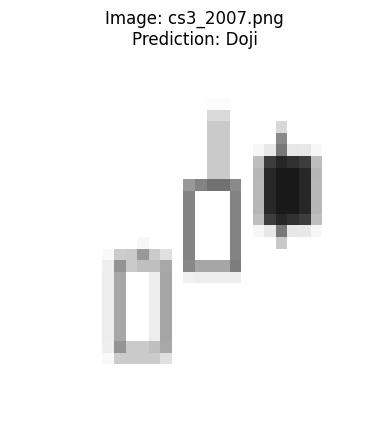

1/1 [==============================] - 0s 35ms/step


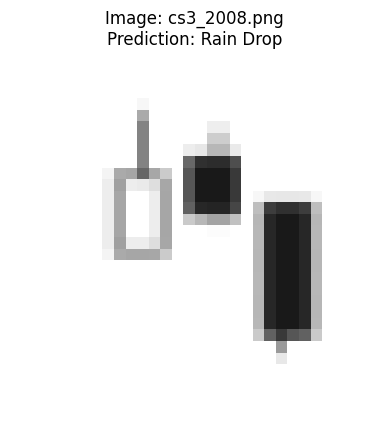

1/1 [==============================] - 0s 29ms/step


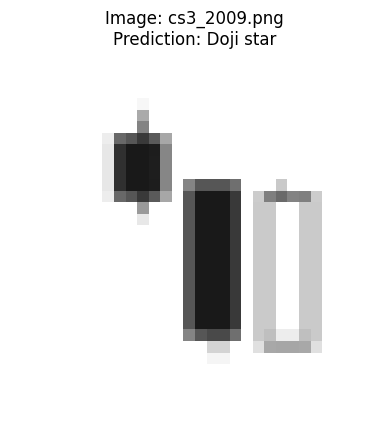

1/1 [==============================] - 0s 29ms/step


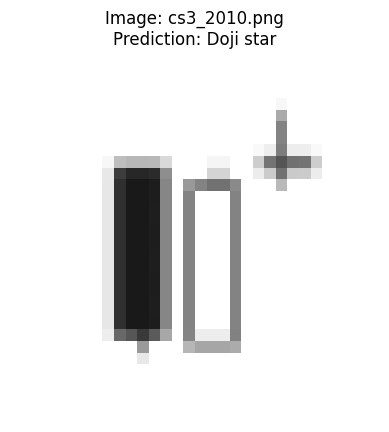

1/1 [==============================] - 0s 38ms/step


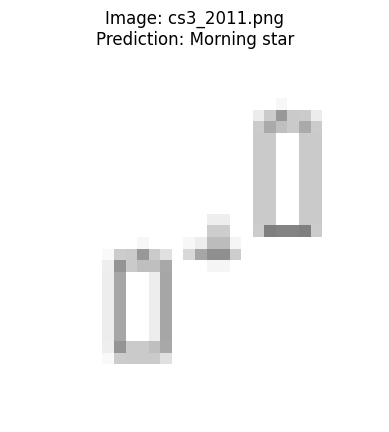

1/1 [==============================] - 0s 30ms/step


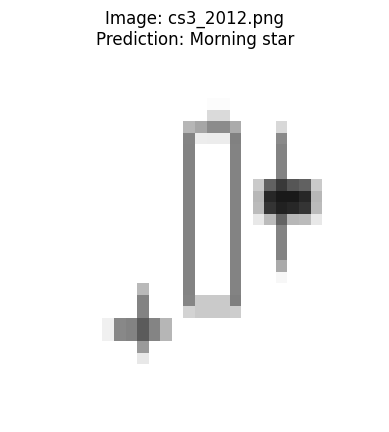

1/1 [==============================] - 0s 30ms/step


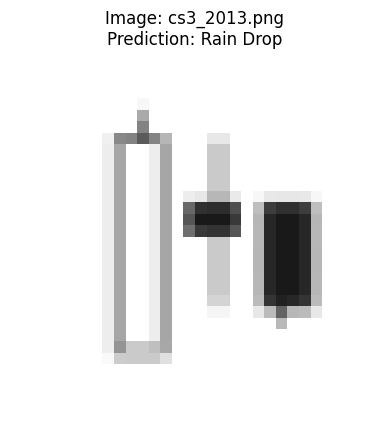

1/1 [==============================] - 0s 33ms/step


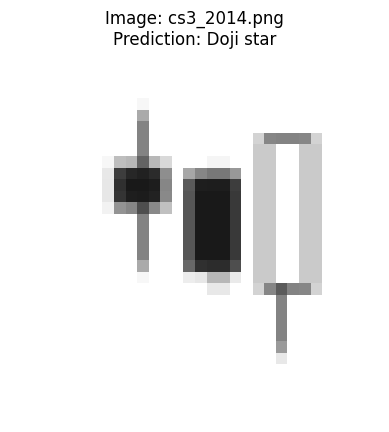

1/1 [==============================] - 0s 43ms/step


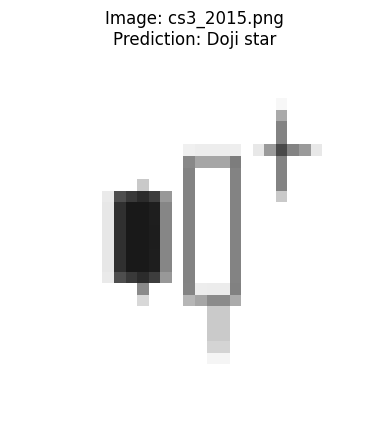

1/1 [==============================] - 0s 33ms/step


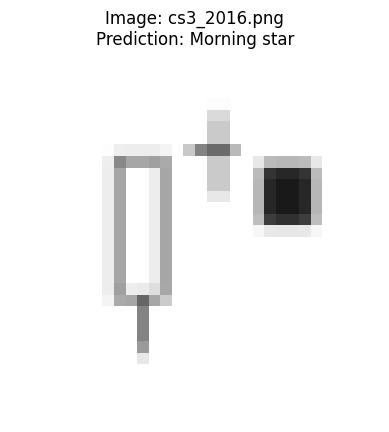

1/1 [==============================] - 0s 30ms/step


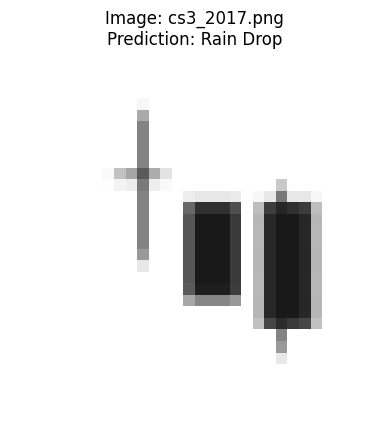

1/1 [==============================] - 0s 33ms/step


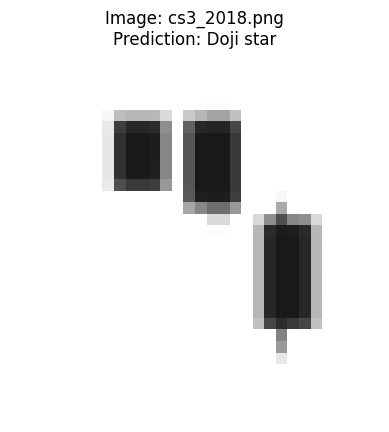

1/1 [==============================] - 0s 33ms/step


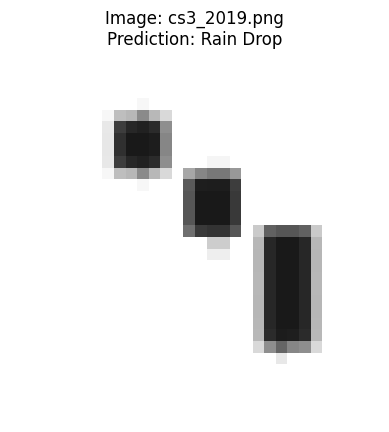

1/1 [==============================] - 0s 34ms/step


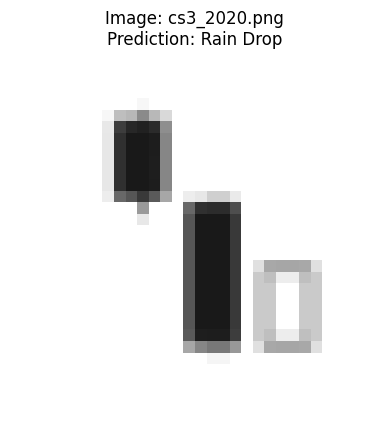

1/1 [==============================] - 0s 39ms/step


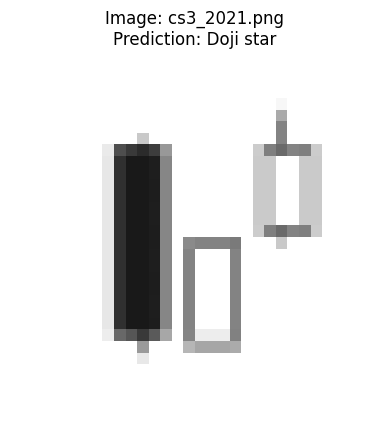

1/1 [==============================] - 0s 32ms/step


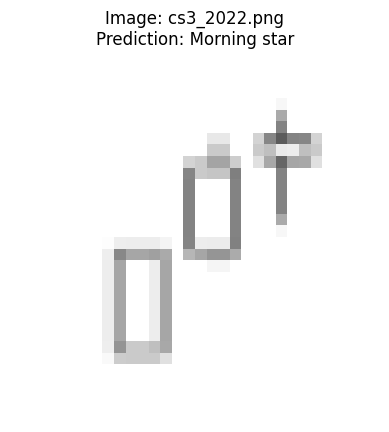

1/1 [==============================] - 0s 34ms/step


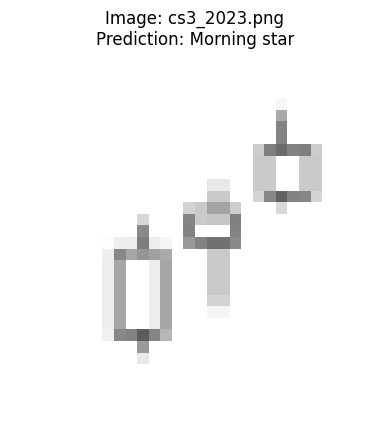

1/1 [==============================] - 0s 31ms/step


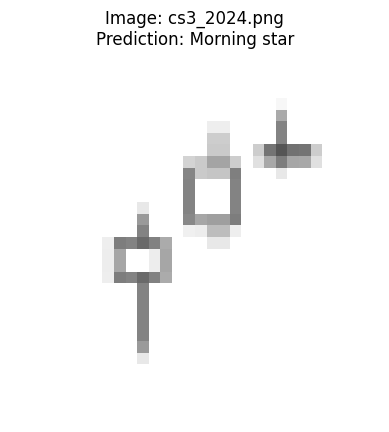

1/1 [==============================] - 0s 20ms/step


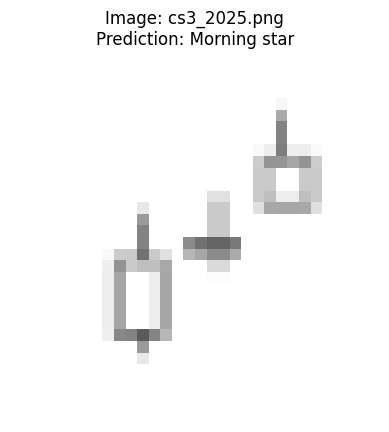

1/1 [==============================] - 0s 19ms/step


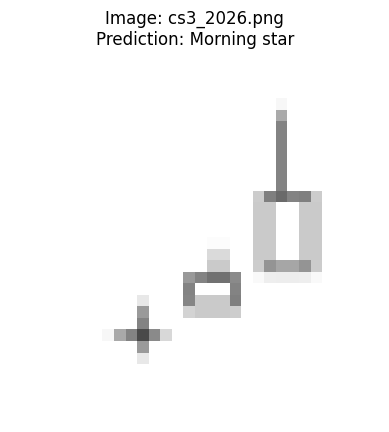

1/1 [==============================] - 0s 23ms/step


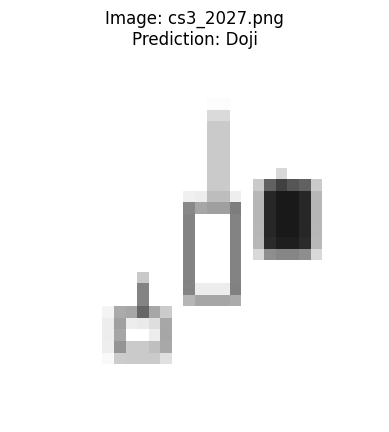

1/1 [==============================] - 0s 21ms/step


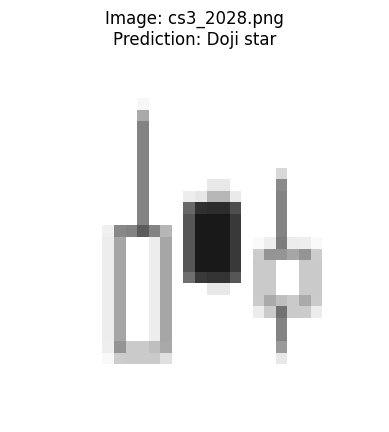

1/1 [==============================] - 0s 21ms/step


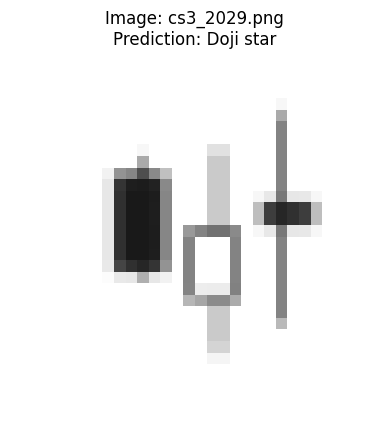

1/1 [==============================] - 0s 20ms/step


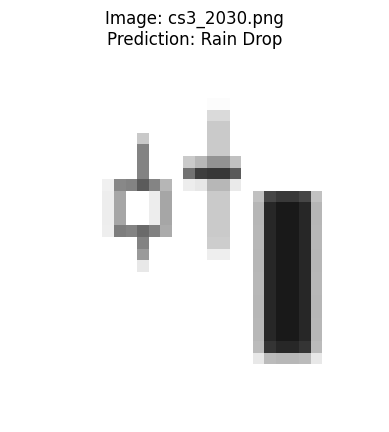

1/1 [==============================] - 0s 20ms/step


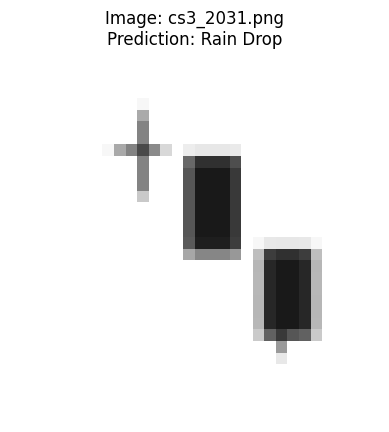

1/1 [==============================] - 0s 20ms/step


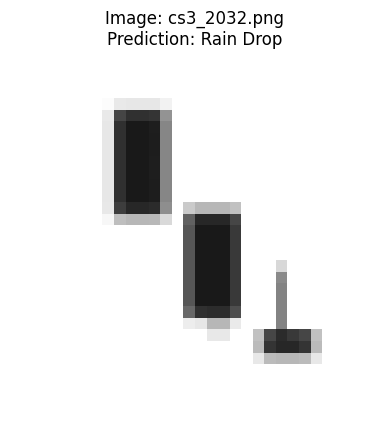

1/1 [==============================] - 0s 20ms/step


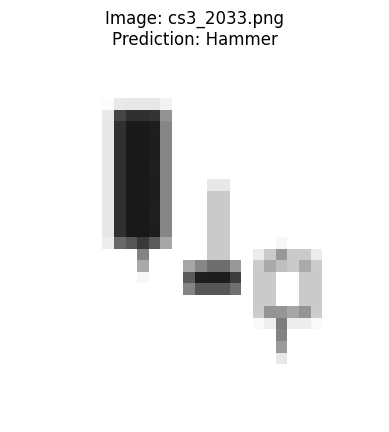

1/1 [==============================] - 0s 20ms/step


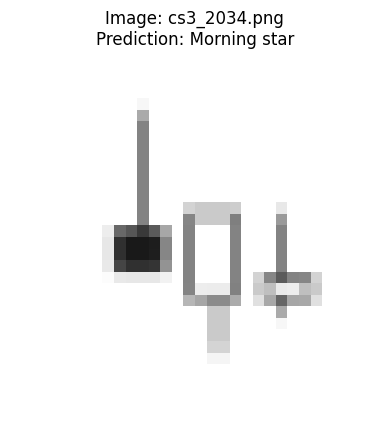

1/1 [==============================] - 0s 20ms/step


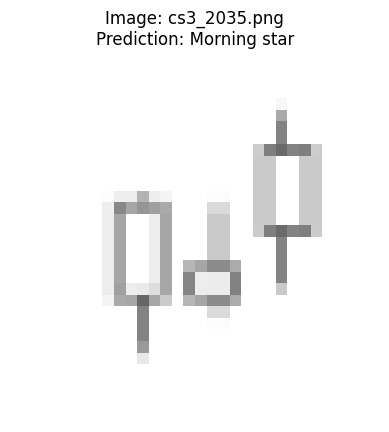

1/1 [==============================] - 0s 20ms/step


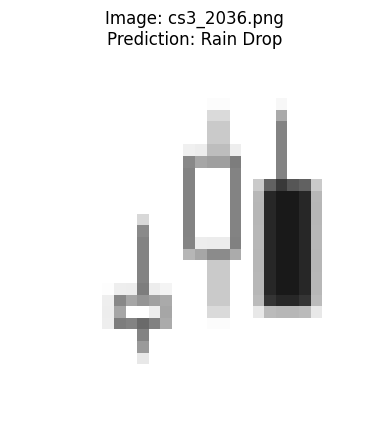

1/1 [==============================] - 0s 21ms/step


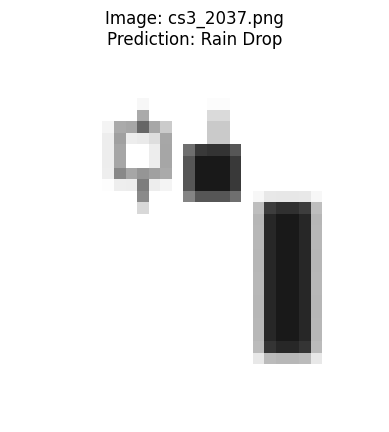

1/1 [==============================] - 0s 22ms/step


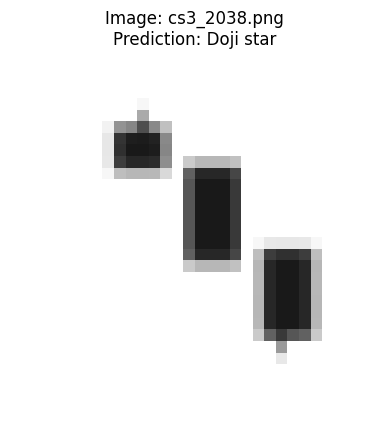

1/1 [==============================] - 0s 20ms/step


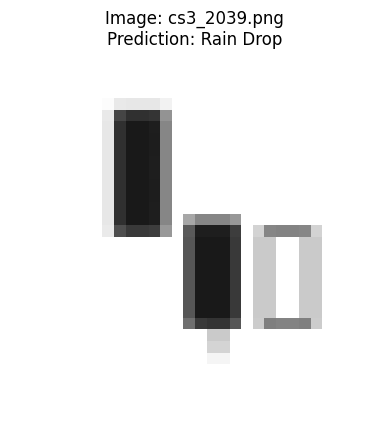

1/1 [==============================] - 0s 20ms/step


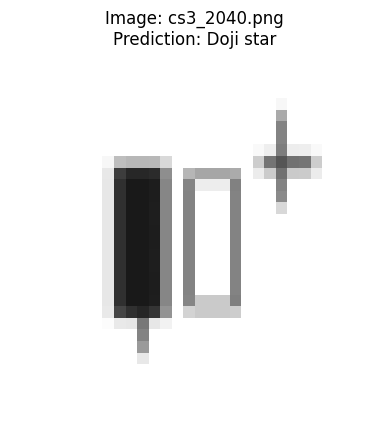

1/1 [==============================] - 0s 22ms/step


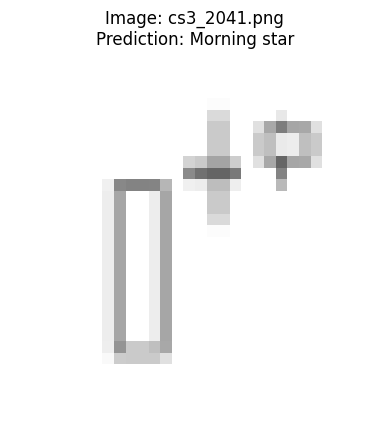

1/1 [==============================] - 0s 20ms/step


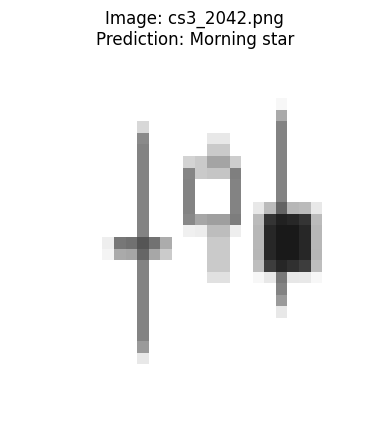

1/1 [==============================] - 0s 22ms/step


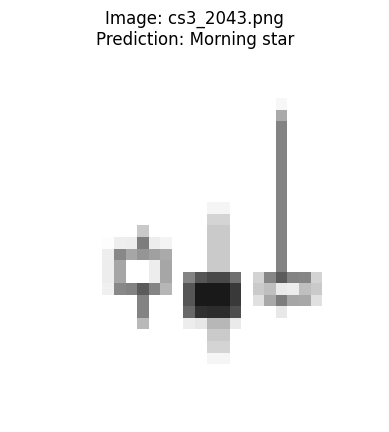

1/1 [==============================] - 0s 21ms/step


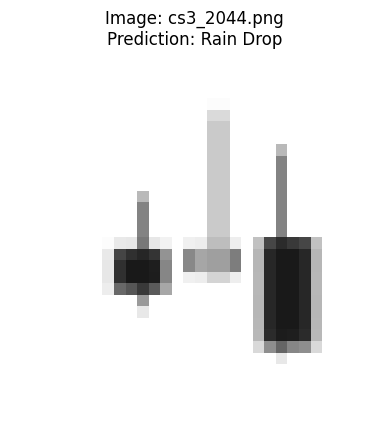

1/1 [==============================] - 0s 21ms/step


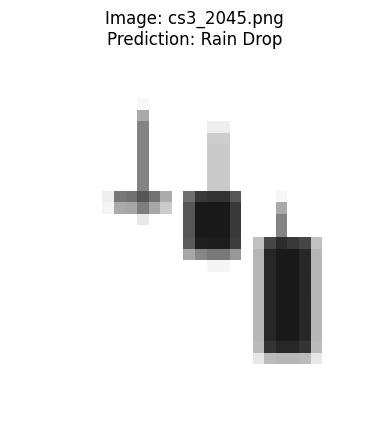

1/1 [==============================] - 0s 20ms/step


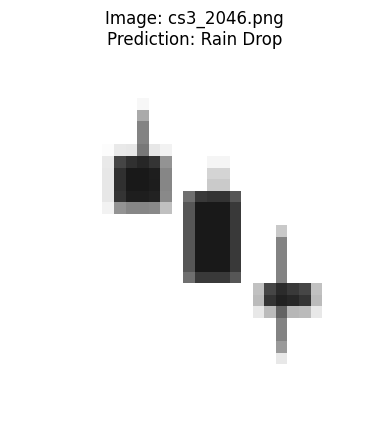

1/1 [==============================] - 0s 21ms/step


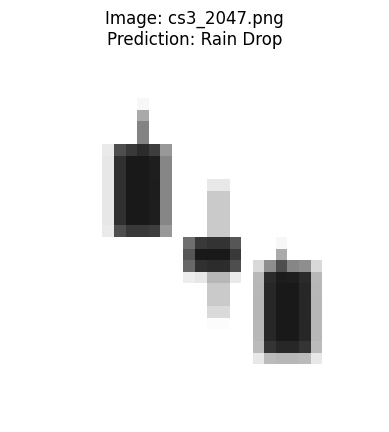

1/1 [==============================] - 0s 21ms/step


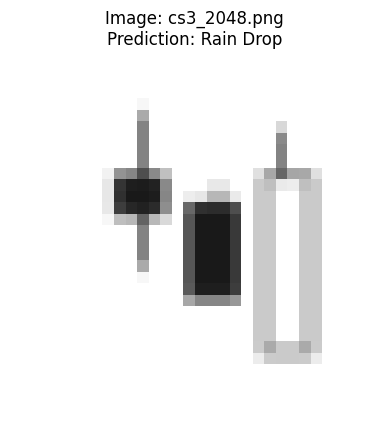

1/1 [==============================] - 0s 20ms/step


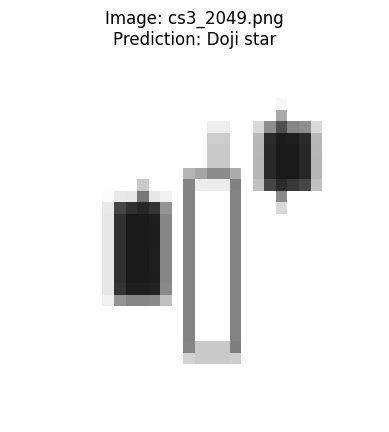

1/1 [==============================] - 0s 21ms/step


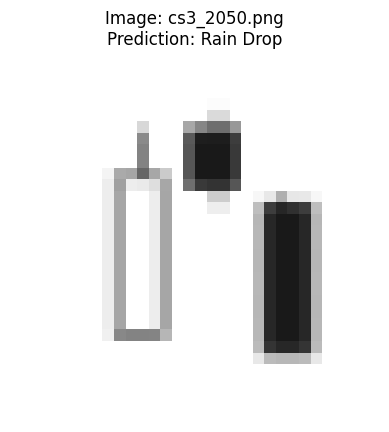

1/1 [==============================] - 0s 21ms/step


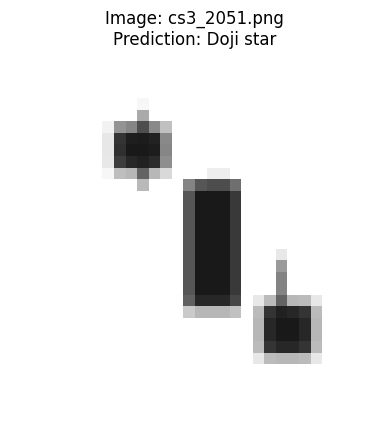

1/1 [==============================] - 0s 22ms/step


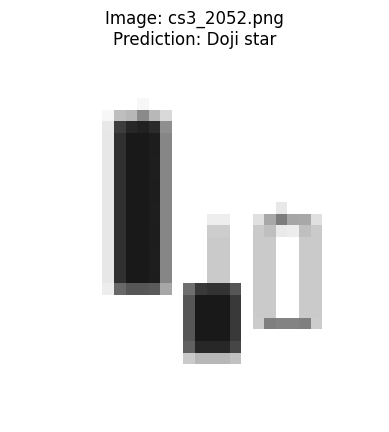

1/1 [==============================] - 0s 21ms/step


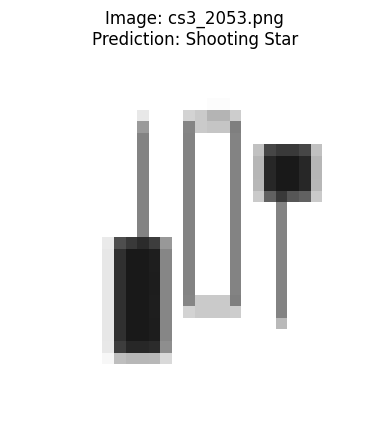

1/1 [==============================] - 0s 20ms/step


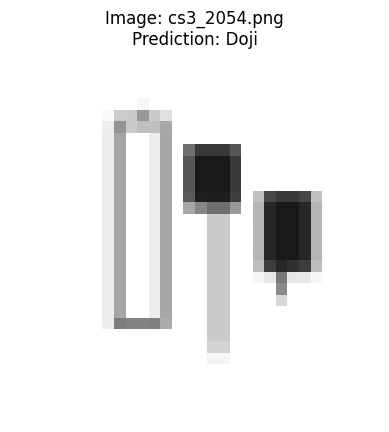

1/1 [==============================] - 0s 23ms/step


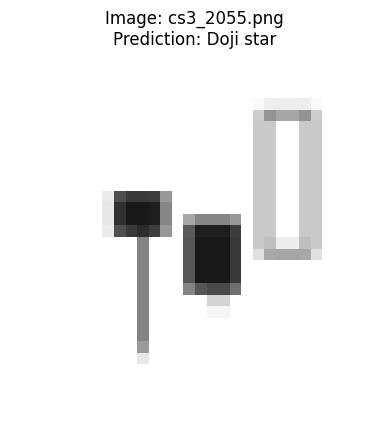

1/1 [==============================] - 0s 21ms/step


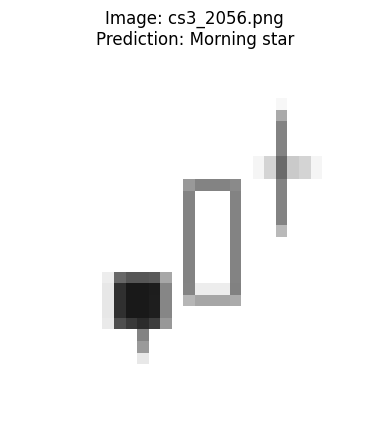

1/1 [==============================] - 0s 20ms/step


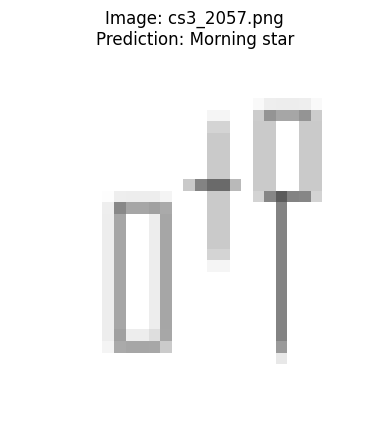

1/1 [==============================] - 0s 19ms/step


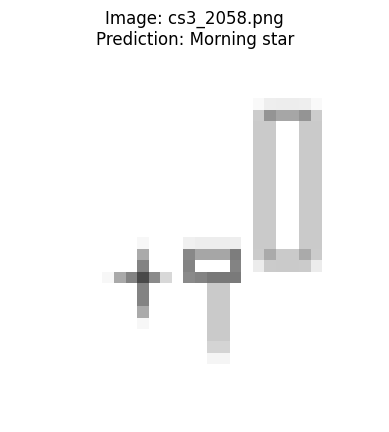

1/1 [==============================] - 0s 29ms/step


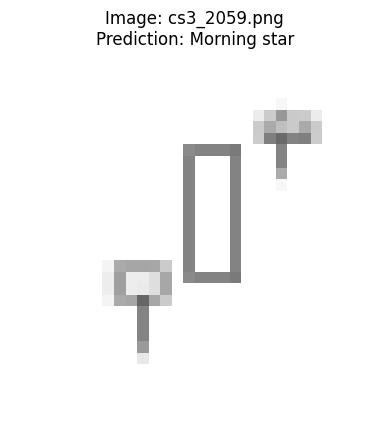

1/1 [==============================] - 0s 21ms/step


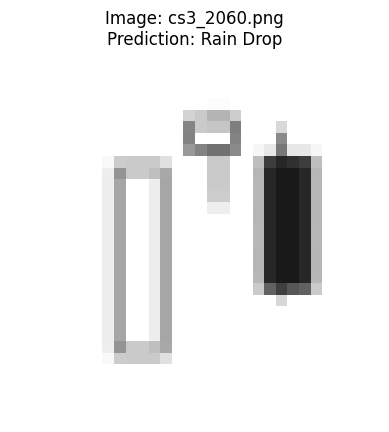

1/1 [==============================] - 0s 20ms/step


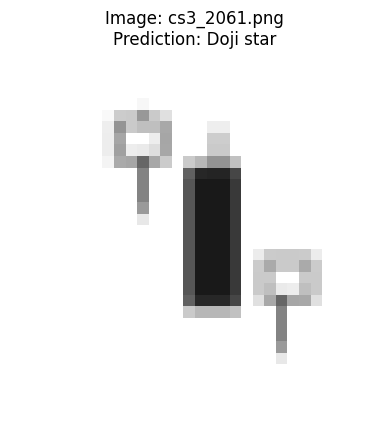

1/1 [==============================] - 0s 20ms/step


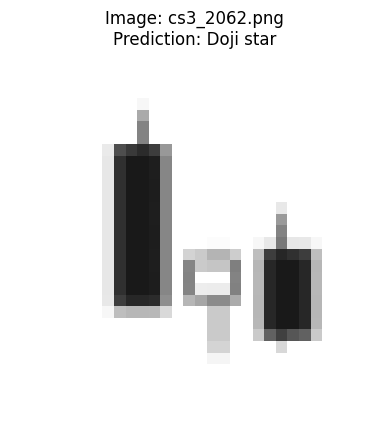

1/1 [==============================] - 0s 23ms/step


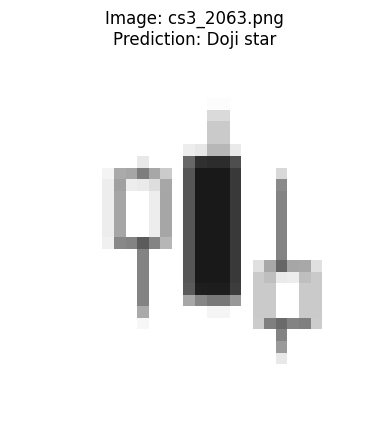

1/1 [==============================] - 0s 30ms/step


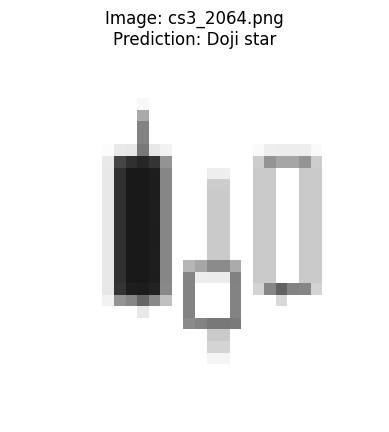

1/1 [==============================] - 0s 29ms/step


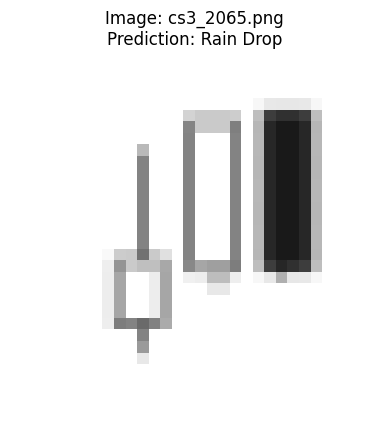

1/1 [==============================] - 0s 39ms/step


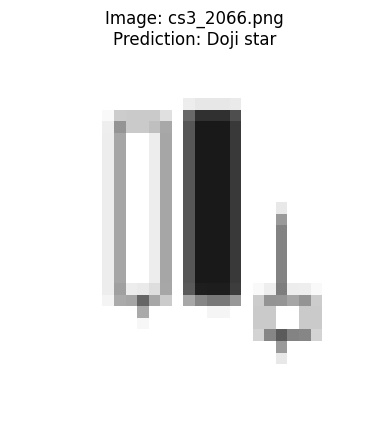

1/1 [==============================] - 0s 42ms/step


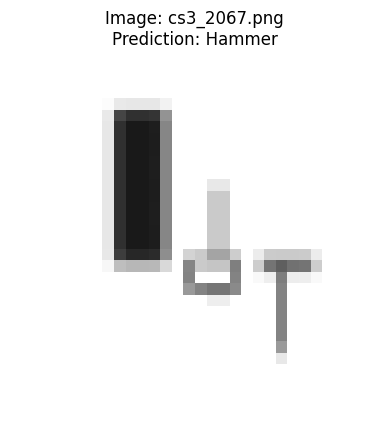

1/1 [==============================] - 0s 36ms/step


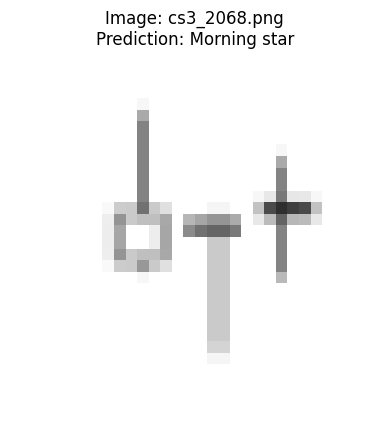

1/1 [==============================] - 0s 30ms/step


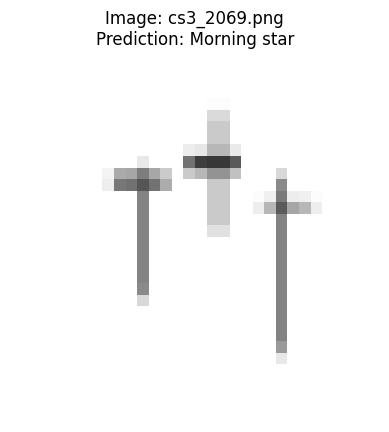

1/1 [==============================] - 0s 30ms/step


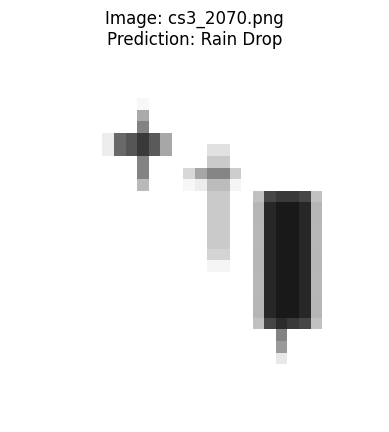

1/1 [==============================] - 0s 44ms/step


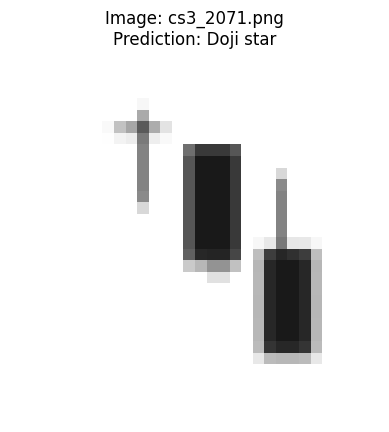

1/1 [==============================] - 0s 34ms/step


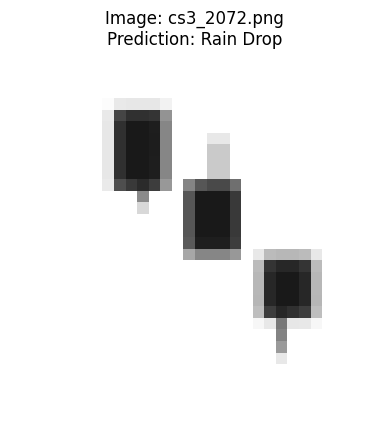

1/1 [==============================] - 0s 42ms/step


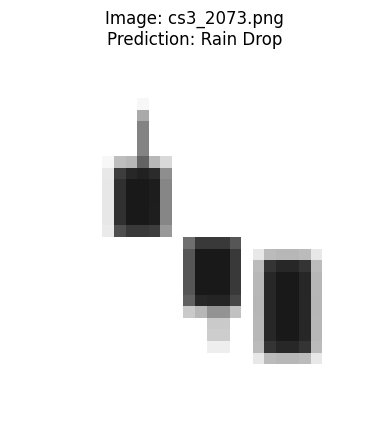

1/1 [==============================] - 0s 53ms/step


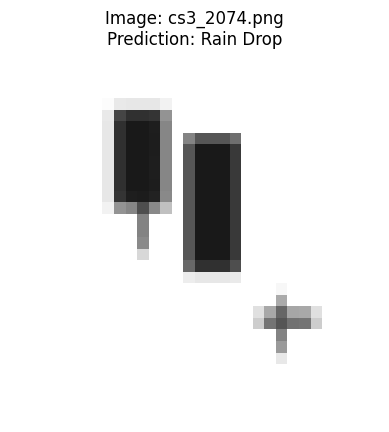

1/1 [==============================] - 0s 34ms/step


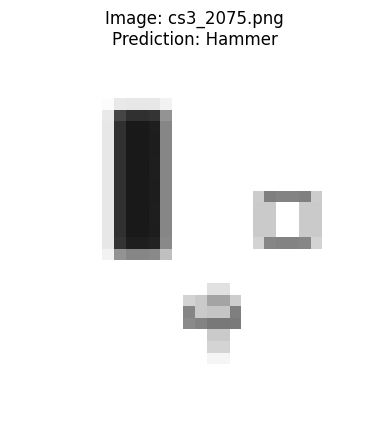

1/1 [==============================] - 0s 33ms/step


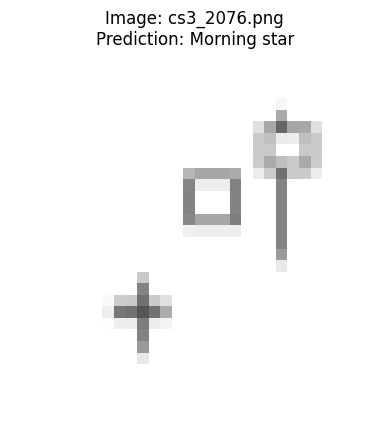

1/1 [==============================] - 0s 43ms/step


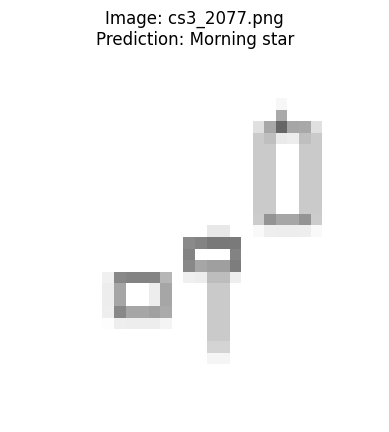

1/1 [==============================] - 0s 37ms/step


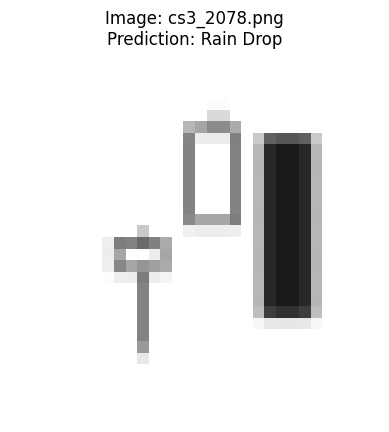

1/1 [==============================] - 0s 38ms/step


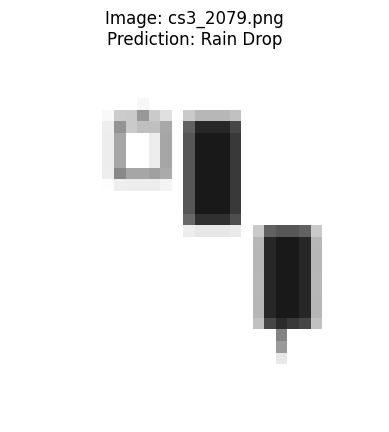

1/1 [==============================] - 0s 29ms/step


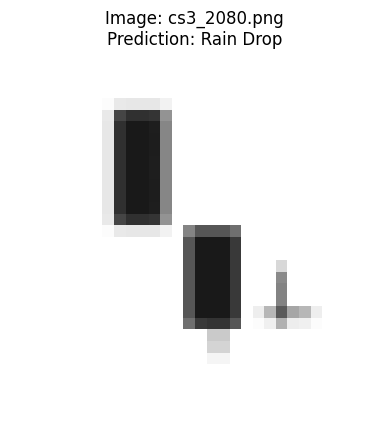

1/1 [==============================] - 0s 20ms/step


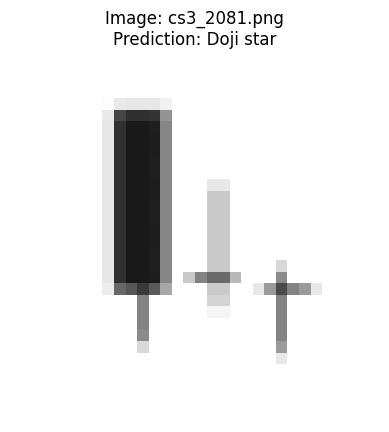

1/1 [==============================] - 0s 20ms/step


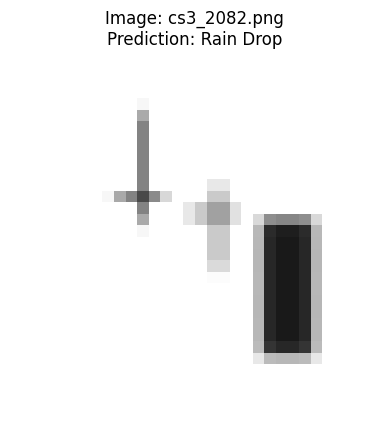

1/1 [==============================] - 0s 21ms/step


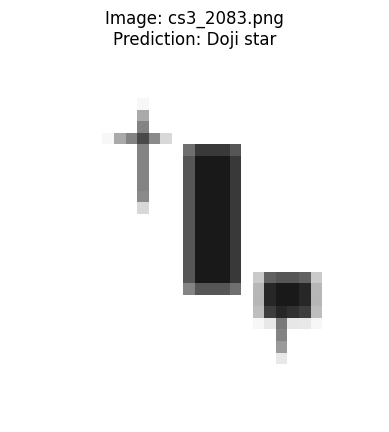

1/1 [==============================] - 0s 20ms/step


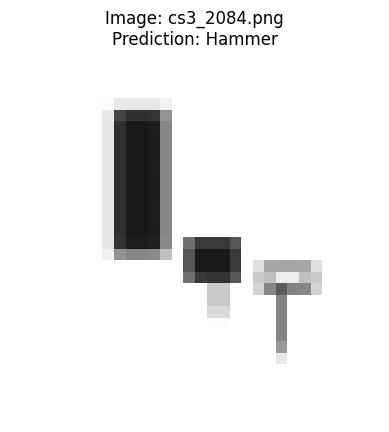

1/1 [==============================] - 0s 22ms/step


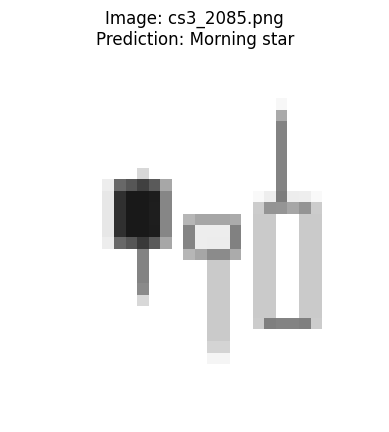

1/1 [==============================] - 0s 22ms/step


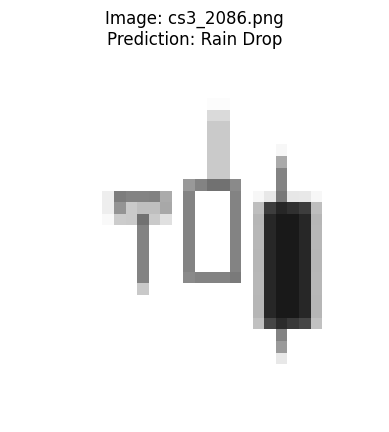

1/1 [==============================] - 0s 21ms/step


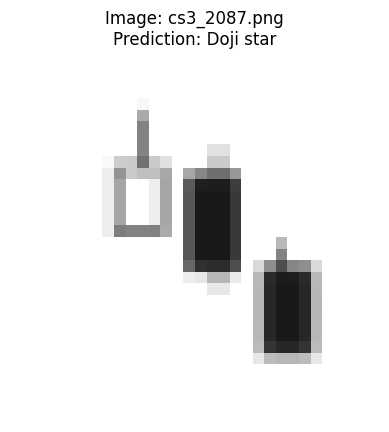

1/1 [==============================] - 0s 21ms/step


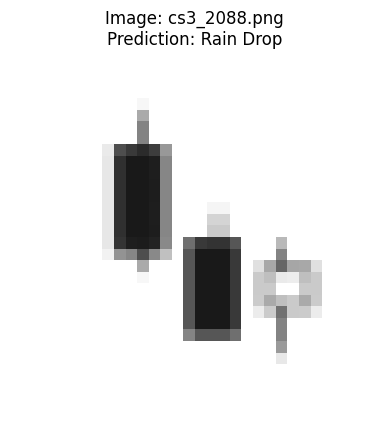

1/1 [==============================] - 0s 21ms/step


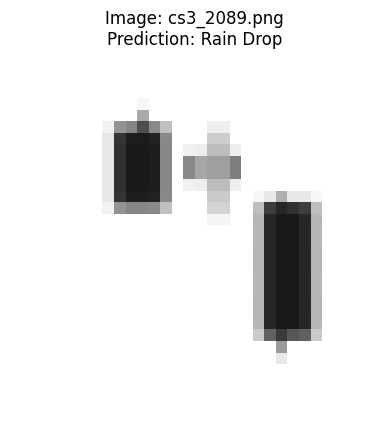

1/1 [==============================] - 0s 20ms/step


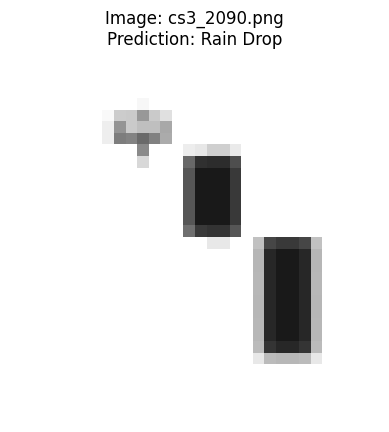

1/1 [==============================] - 0s 22ms/step


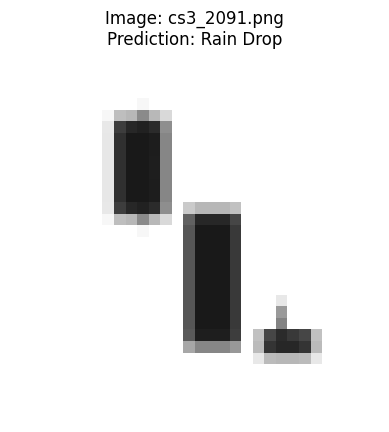

1/1 [==============================] - 0s 21ms/step


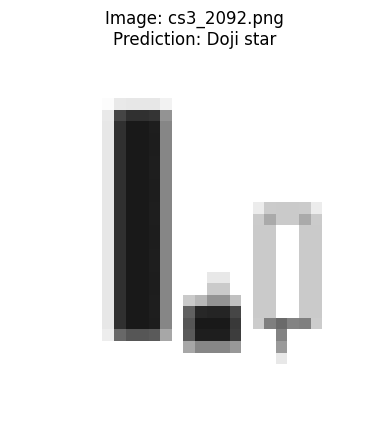

1/1 [==============================] - 0s 20ms/step


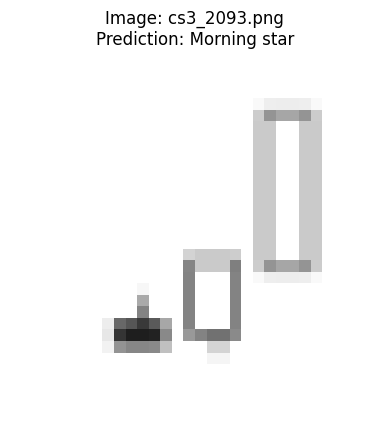

1/1 [==============================] - 0s 23ms/step


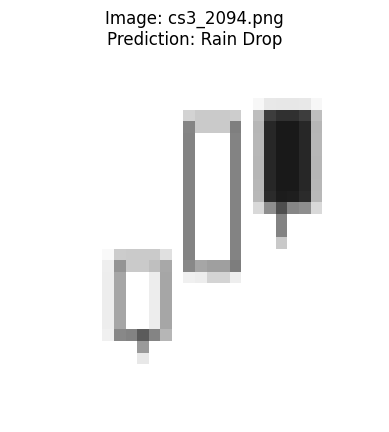

1/1 [==============================] - 0s 21ms/step


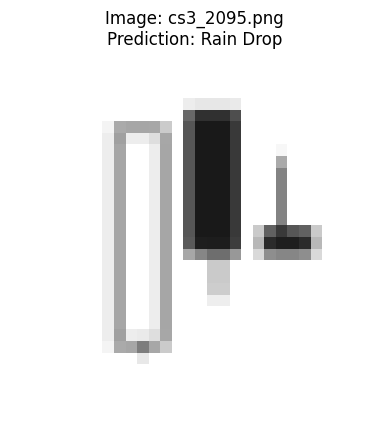

1/1 [==============================] - 0s 22ms/step


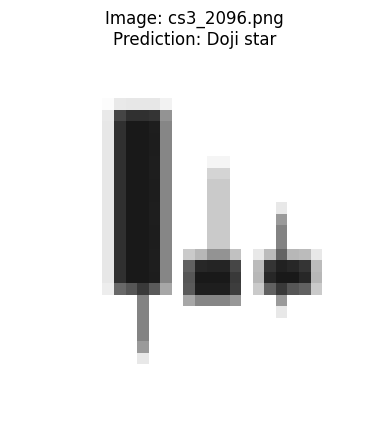

1/1 [==============================] - 0s 21ms/step


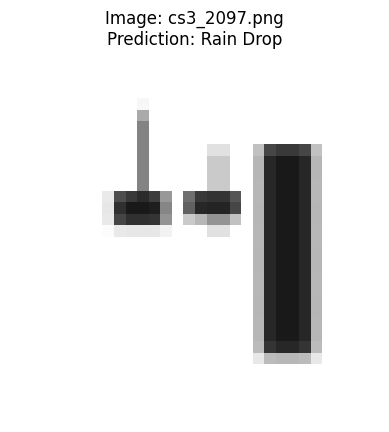

1/1 [==============================] - 0s 20ms/step


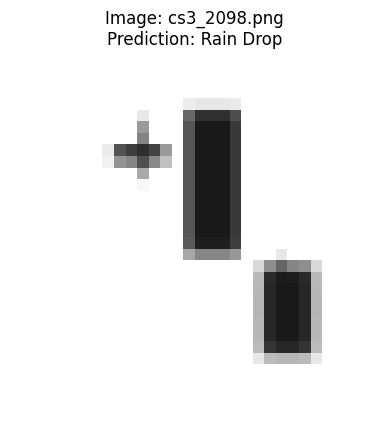

1/1 [==============================] - 0s 20ms/step


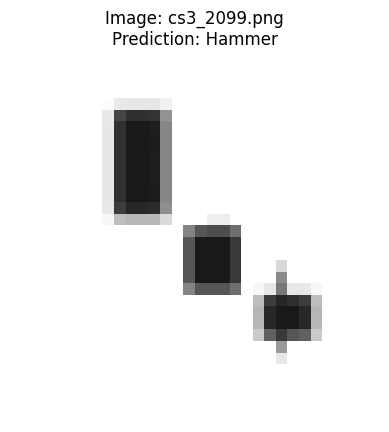

1/1 [==============================] - 0s 21ms/step


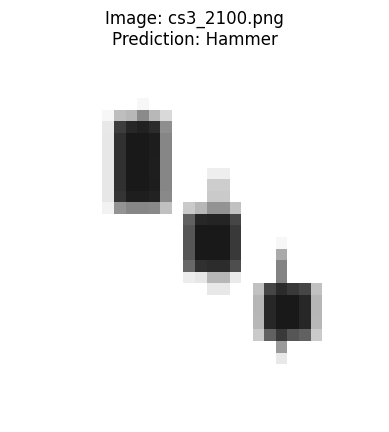

In [5]:
# Save the trained model
model.save('custom_classes_model.h5')

# Load the trained model
model = keras.models.load_model('custom_classes_model.h5')

# Directory containing input images
input_directory = '/content/drive/MyDrive/NEWDATASET'

# List input images
input_images = os.listdir(input_directory)

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read the input image
    img = cv2.imread(image_path)

    # Check if the image was read successfully
    if img is None:
        print(f"Error: Unable to read image '{image_file}'. Skipping...")
        continue

    # Resize and preprocess the input image
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=0)

    # Predict using the model
    prediction = model.predict(img)

    # Classify the prediction
    class_index = np.argmax(prediction)
    result = class_names[class_index]

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()
